# Documentation and Functions

In [1]:
# # Check required packages and dependencies:
# !pip freeze > requirements.txt

In [2]:
import os

# Measure Package 0: Baseline
menu_mp = 0
input_mp = 'baseline'

# Get the current working directory of the project
project_root = os.path.abspath(os.getcwd())
print(f"Project root directory: {project_root}")

# Relative path to the file from the project root
relative_path = r"tare_model_functions_v1.4.1.ipynb"

# Construct the absolute path to the file
file_path = os.path.join(project_root, relative_path)
print(f"File path: {file_path}")

# Run the notebook and import variables
if os.path.exists(relative_path):
    get_ipython().run_line_magic('run', f'-i "{relative_path}"')
    print("Loaded All TARE Model Functions")
else:
    print(f"File not found: {relative_path}")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v1.4.1.ipynb
Loaded All TARE Model Functions


In [3]:
from datetime import datetime

# Get the current datetime
# Start the timer
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from tabulate import tabulate

# Set the font for Matplotlib
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

# Set the font for Seaborn
sns.set(font='sans-serif', style='darkgrid')

In [5]:
# pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [6]:
# Format the name of the exported results file using the location ID
from datetime import datetime
result_export_time = datetime.now()
results_export_formatted_date = result_export_time.strftime("%Y-%m-%d_%H-%M")

In [7]:
# Select whether to begin new run or visualize existing model outputs
while True:
    try:
        start_new_model_run = str(input("""
Would you like to begin a new simulation or visualize output results from a previous model run? Please enter one of the following:
Y. I'd like to start a new model run.
N. I'd like to visualize output results from a previous model run.""")).upper()

        if start_new_model_run == 'Y':
            model_run_date_time = results_export_formatted_date           
            print(f"Project root directory: {project_root}")

#             scenario_selection = str(input("""
# Would you like to model the 'AEO2023 Reference Case' or 'High Uptake of Inflation Reduction Act'? Please enter one of the following:
# IRA-Reference Scenario: Enter 'AEO2023 Reference Case'
# IRA-High Scenario: Enter 'High Uptake of Inflation Reduction Act'
# """)).upper()
            
            # Relative path to the file from the project root
            relative_path = r"tare_model_run_simulation_v1.4.1.ipynb"

            # Construct the absolute path to the file
            file_path = os.path.join(project_root, relative_path)
            print(f"File path: {file_path}")

            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(project_root, r"output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")
            save_figure_directory = str(output_folder_path)

            # Run the notebook and import variables
            if os.path.exists(relative_path):
                get_ipython().run_line_magic('run', f'-i "{relative_path}"')
            else:
                print(f"File not found: {relative_path}")

            break  # Exit the loop if input is 'Y'
            
        elif start_new_model_run == 'N':
            # Enter the date time of the model run in the following format: YYYY-MM-DD_HH-MM
            model_run_date_time = str(input("Enter the date time of the model run in the following format YYYY-MM-DD_HH-MM: "))
            print(f"Project root directory: {project_root}")
            
            # Storing Result Outputs in output_results folder
            relative_path = r"output_results"
            output_folder_path = os.path.join(project_root, relative_path)
            print(f"Result outputs will be exported here: {output_folder_path}")

            save_figure_directory = str(output_folder_path)
            
            break  # Exit the loop if input is 'N'
        
        else:
            print("Invalid input. Please enter 'Y' or 'N'.")
    
    except Exception as e:
        print("Invalid input. Please try again.")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_run_simulation_v1.4.1.ipynb
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results
Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_baseline_cambium_v1.4.1.ipynb
Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v1.4.1.ipynb
Loaded All TARE Model Functions
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results

-------------------------------------------------------------------------------------------------------
Welcome to the Trade-off Analysis of residential Retrofits for energy Equity Tool (TARE Model)
Let's start by reading the data from the NREL EUSS Database.

Make sure that the zipped folders stay organized as they are once unzipped.

# Baseline Scenario

### Convert Results Output CSVs to Dataframes

In [8]:
# Baseline
# load_scenario_data(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'baseline_summary'

df_outputs_baseline_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Whole-Home data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Heating data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Water Heating data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Clothes Drying data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Cooking data for policy_scenario 'baseline_summary' 



In [9]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_baseline_heating['end_use'] = 'heating'
df_outputs_baseline_heating['base_fuel'] = df_outputs_baseline_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_baseline_waterHeating['end_use'] = 'waterHeating'
df_outputs_baseline_waterHeating['base_fuel'] = df_outputs_baseline_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_baseline_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_baseline_clothesDrying['base_fuel'] = df_outputs_baseline_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_baseline_cooking['end_use'] = 'cooking'
df_outputs_baseline_cooking['base_fuel'] = df_outputs_baseline_home['base_cooking_fuel']

# Energy Efficiency Retrofit Scenarios

In [10]:
print("""
----------------------------------------------------------------------------------------------
Scenarios for Basic, Moderate, and Advanced Retrofit
----------------------------------------------------------------------------------------------
Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic Pre-IRA: Basic Retrofit (MP8), Pre-IRA Costs, Current Electricity Grid
    - Basic IRA-Reference: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic IRA-High: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
    
Advanced Retrofit Scenarios
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced Pre-IRA: Advanced Retrofit (MP10), Pre-IRA Costs, Current Electricity Grid
    - Advanced IRA-Reference: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced IRA-High: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid

Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
""", "\n")


----------------------------------------------------------------------------------------------
Scenarios for Basic, Moderate, and Advanced Retrofit
----------------------------------------------------------------------------------------------
Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic Pre-IRA: Basic Retrofit (MP8), Pre-IRA Costs, Current Electricity Grid
    - Basic IRA-Reference: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic IRA-High: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
  

-------------------------------------------------------------------------------------------------------
# BASIC RETROFIT MEASURE PACKAGE 8
-------------------------------------------------------------------------------------------------------
## - BASIC Pre-IRA Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 8
    - AEO2023 No Inflation Reduction Act
    - Cambium 2021 MidCase

## - BASIC IRA-Reference Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 8
    - AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
    - Cambium 2022 and 2023 MidCase

## Model Run Calculations

In [11]:
# print("""
# ----------------------------------------------------------------------------------------------
# Basic Retrofit Scenarios
# ----------------------------------------------------------------------------------------------
# - The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
#     - Basic Pre-IRA: Basic Retrofit (MP8), Pre-IRA Costs, Current Electricity Grid
#     - Basic IRA-Reference: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
#     - Basic IRA-High: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid
# ----------------------------------------------------------------------------------------------
# Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
# The same filters are applied.
# ----------------------------------------------------------------------------------------------
# """, "\n")

## Convert Results Output CSVs to Dataframes

In [12]:
# MP8: 'retrofit_basic'
# load_scenario_data(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_basic_summary'
menu_mp = 8

df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Whole-Home data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Heating data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Water Heating data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Clothes Drying data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Cooking data for policy_scenario 'retrofit_basic_summary' 



In [13]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_basic_heating['end_use'] = 'heating'
df_outputs_basic_heating['base_fuel'] = df_outputs_basic_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_basic_waterHeating['end_use'] = 'waterHeating'
df_outputs_basic_waterHeating['base_fuel'] = df_outputs_basic_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_basic_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_basic_clothesDrying['base_fuel'] = df_outputs_basic_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_basic_cooking['end_use'] = 'cooking'
df_outputs_basic_cooking['base_fuel'] = df_outputs_basic_home['base_cooking_fuel']

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Basic Retrofit (MP8)

In [14]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'heating'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Heating'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Heating Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Heating Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Heating Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Heating Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Heating Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Heating Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,7604.73,-18876.40,-13166.50,-18876.40,-5561.77,-13594.32,-7884.41,-13594.32,-279.68
std,0.00,10985.68,11166.66,11938.16,11166.66,14634.70,11395.22,12116.93,11395.22,14711.90
min,0.00,0.00,-253851.08,-243327.46,-253851.08,-138461.09,-244035.98,-233512.36,-244035.98,-132158.32
25%,0.00,0.00,-23960.35,-19120.70,-23960.35,-13304.82,-18921.42,-14038.69,-18921.42,-7976.34
50%,0.00,3062.25,-18075.18,-12024.22,-18075.18,-7219.90,-13105.50,-7007.97,-13105.50,-2530.46
75%,0.00,11391.33,-13130.63,-6374.85,-13130.63,-425.36,-8036.10,-1460.96,-8036.10,3968.08
max,0.00,221182.81,129624.06,130521.10,129624.06,249538.12,146529.01,147426.05,146529.01,266443.07


In [15]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'heating'
mer_type = 'srmer'

# Labels for column names
category_label = 'Heating'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Heating Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Heating Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Heating Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Heating Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Heating Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Heating Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,8505.25,-18876.40,-13166.50,-18876.40,-4661.24,-13594.32,-7884.41,-13594.32,620.84
std,0.00,13918.97,11166.66,11938.16,11166.66,19056.68,11395.22,12116.93,11395.22,19899.60
min,0.00,0.00,-253851.08,-243327.46,-253851.08,-143378.23,-244035.98,-233512.36,-244035.98,-137075.46
25%,0.00,0.00,-23960.35,-19120.70,-23960.35,-13930.19,-18921.42,-14038.69,-18921.42,-8949.01
50%,0.00,3154.52,-18075.18,-12024.22,-18075.18,-7914.49,-13105.50,-7007.97,-13105.50,-3254.74
75%,0.00,11537.34,-13130.63,-6374.85,-13130.63,-1140.03,-8036.10,-1460.96,-8036.10,3559.93
max,0.00,354172.76,129624.06,130521.10,129624.06,484693.86,146529.01,147426.05,146529.01,501598.81


In [16]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [17]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

### Water Heating

In [18]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'waterHeating'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Water Heating'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Water Heating Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Water Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]"
count,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00
mean,0.00,1264.17,-1393.22,-292.25,-1393.22,971.92,-131.13,969.84,-131.13,2234.01
std,0.00,1472.05,1473.39,1587.25,1473.39,2280.37,1369.16,1486.01,1369.16,2237.57
min,0.00,0.00,-11629.73,-11596.08,-11629.73,-7512.57,-10237.63,-10203.98,-10237.63,-5360.33
25%,0.00,0.00,-2203.69,-1141.66,-2203.69,-390.07,-878.29,193.18,-878.29,873.00
50%,0.00,850.31,-1682.72,-435.48,-1682.72,336.64,-417.62,839.76,-417.62,1587.26
75%,0.00,1960.43,-931.66,333.45,-931.66,1622.04,233.96,1511.75,233.96,2904.47
max,0.00,17193.67,25210.06,26546.39,25210.06,38174.87,26163.78,27500.11,26163.78,39128.59


In [19]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'waterHeating'
mer_type = 'srmer'

# Labels for column names
category_label = 'Water Heating'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Water Heating Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Water Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]"
count,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00
mean,0.00,1751.40,-1393.22,-292.25,-1393.22,1459.15,-131.13,969.84,-131.13,2721.23
std,0.00,2405.48,1473.39,1587.25,1473.39,3487.94,1369.16,1486.01,1369.16,3349.52
min,0.00,0.00,-11629.73,-11596.08,-11629.73,-7857.96,-10237.63,-10203.98,-10237.63,-6465.86
25%,0.00,0.00,-2203.69,-1141.66,-2203.69,-517.93,-878.29,193.18,-878.29,839.03
50%,0.00,1040.46,-1682.72,-435.48,-1682.72,279.52,-417.62,839.76,-417.62,1584.00
75%,0.00,2358.05,-931.66,333.45,-931.66,2177.34,233.96,1511.75,233.96,3339.20
max,0.00,36411.69,25210.06,26546.39,25210.06,50472.44,26163.78,27500.11,26163.78,51426.16


In [20]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='waterHeating',
#                            upgrade_column='upgrade_water_heater_efficiency'
#                           )

In [21]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='waterHeating',
#                                upgrade_column='upgrade_water_heater_efficiency'
#                               )

### Clothes Drying

In [22]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'clothesDrying'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Clothes Drying'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Clothes Drying Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Clothes Drying Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],LESS WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],MORE WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,137.92,-1573.77,-986.77,-1573.77,-848.85,-666.26,-79.26,-666.26,58.65
std,0.00,244.51,583.30,663.94,583.30,628.87,526.42,614.45,526.42,574.56
min,0.00,0.00,-6421.63,-5560.34,-6421.63,-5560.34,-4326.45,-3547.57,-4326.45,-3477.07
25%,0.00,0.00,-1940.86,-1402.87,-1940.86,-1239.15,-1011.17,-472.92,-1011.17,-306.91
50%,0.00,0.00,-1562.51,-930.63,-1562.51,-827.80,-669.30,-26.41,-669.30,72.60
75%,0.00,241.08,-1191.52,-518.27,-1191.52,-444.85,-325.50,348.38,-325.50,417.00
max,0.00,2732.32,1964.42,2563.58,1964.42,3640.90,2797.43,3396.59,2797.43,4473.91


In [23]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'clothesDrying'
mer_type = 'srmer'

# Labels for column names
category_label = 'Clothes Drying'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Clothes Drying Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Clothes Drying Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],LESS WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],MORE WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,333.30,-1573.77,-986.77,-1573.77,-653.47,-666.26,-79.26,-666.26,254.04
std,0.00,507.94,583.30,663.94,583.30,833.10,526.42,614.45,526.42,772.73
min,0.00,0.00,-6421.63,-5560.34,-6421.63,-5560.34,-4326.45,-3547.57,-4326.45,-3477.07
25%,0.00,0.00,-1940.86,-1402.87,-1940.86,-1154.52,-1011.17,-472.92,-1011.17,-220.60
50%,0.00,40.23,-1562.51,-930.63,-1562.51,-700.71,-669.30,-26.41,-669.30,191.14
75%,0.00,553.47,-1191.52,-518.27,-1191.52,-229.91,-325.50,348.38,-325.50,624.30
max,0.00,5531.28,1964.42,2563.58,1964.42,6341.65,2797.43,3396.59,2797.43,7174.66


In [24]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='clothesDrying',
#                            upgrade_column='upgrade_clothes_dryer'
#                           )

In [25]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='clothesDrying',
#                                upgrade_column='upgrade_clothes_dryer'
#                               )

### Cooking

In [26]:
# # Lifetime Summary Stats
# category = 'cooking'

# # Annual/One-Time Metrics Summary Stats
# df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_basic_home['baseline_cooking_damages_climate'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_climate']
# df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_basic_home['baseline_cooking_damages_health'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_health']

# summarize_stats_table(df=df_outputs_basic_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost',                          
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Reference Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} Pre-IRA Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} Pre-IRA Reduction in Annual Climate Damages [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Reference Reduction in Annual Climate Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost': f'Pre-IRA MP{menu_mp} Cooking Net Equipment Capital Cost [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Cooking Net Equipment Capital Cost [$USD]',                          
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [27]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'cooking'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Cooking'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Cooking Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Cooking Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Cooking Private NPV [$USD],LESS WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Cooking Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Cooking Private NPV [$USD],MORE WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Cooking Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,148.51,-1608.80,-1391.41,-1608.80,-1242.90,-626.95,-409.55,-626.95,-261.04
std,0.00,144.68,541.32,567.86,541.32,535.96,539.12,541.07,539.12,509.14
min,0.00,0.00,-6720.41,-6699.47,-6720.41,-6594.93,-4444.82,-4423.88,-4444.82,-4319.34
25%,0.00,0.00,-1950.56,-1757.33,-1950.56,-1587.20,-976.38,-761.70,-976.38,-595.35
50%,0.00,132.92,-1590.87,-1382.95,-1590.87,-1234.87,-611.56,-400.27,-611.56,-257.76
75%,0.00,215.50,-1245.20,-1015.23,-1245.20,-891.58,-261.01,-51.48,-261.01,72.67
max,0.00,1553.73,757.39,1366.42,757.39,1544.20,1656.17,2265.20,1656.17,2442.98


In [28]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'cooking'
mer_type = 'srmer'

# Labels for column names
category_label = 'Cooking'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP_{mer_type}': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP_{mer_type}': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Cooking Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Cooking Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Cooking Private NPV [$USD],LESS WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Cooking Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Cooking Private NPV [$USD],MORE WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Cooking Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,228.69,-1608.80,-1391.41,-1608.80,-1162.72,-626.95,-409.55,-626.95,-180.86
std,0.00,205.47,541.32,567.86,541.32,562.18,539.12,541.07,539.12,552.80
min,0.00,0.00,-6720.41,-6699.47,-6720.41,-6373.11,-4444.82,-4423.88,-4444.82,-4097.52
25%,0.00,0.00,-1950.56,-1757.33,-1950.56,-1506.25,-976.38,-761.70,-976.38,-520.09
50%,0.00,252.82,-1590.87,-1382.95,-1590.87,-1134.78,-611.56,-400.27,-611.56,-156.26
75%,0.00,379.09,-1245.20,-1015.23,-1245.20,-788.48,-261.01,-51.48,-261.01,185.28
max,0.00,1439.96,757.39,1366.42,757.39,1366.42,1656.17,2265.20,1656.17,2265.20


In [29]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='cooking',
#                            upgrade_column='upgrade_cooking_range'
#                           )

In [30]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='cooking',
#                                upgrade_column='upgrade_cooking_range'
#                               )

-------------------------------------------------------------------------------------------------------
# MODERATE RETROFIT MEASURE PACKAGE 9
-------------------------------------------------------------------------------------------------------
## - MODERATE Pre-IRA Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 9
    - AEO2023 No Inflation Reduction Act
    - Cambium 2021 MidCase
      
## - MODERATE IRA-Reference Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 9
    - AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
    - Cambium 2022 and 2023 MidCase

## Model Run Calculations

In [31]:
print("""
----------------------------------------------------------------------------------------------
Moderate Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
""", "\n")


----------------------------------------------------------------------------------------------
Moderate Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
 



In [32]:
# df_euss_am_mp9_home

## Convert Results Output CSVs to Dataframes

In [33]:
# MP9: 'scenario_1B_2B_3B'
# convert_scenario_to_dataframes(category, output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_moderate_summary'
menu_mp = 9

df_outputs_moderate_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Whole-Home data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Heating data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Water Heating data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Clothes Drying data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Cooking data for policy_scenario 'retrofit_moderate_summary' 



In [34]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_moderate_heating['end_use'] = 'heating'
df_outputs_moderate_heating['base_fuel'] = df_outputs_moderate_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_moderate_waterHeating['end_use'] = 'waterHeating'
df_outputs_moderate_waterHeating['base_fuel'] = df_outputs_moderate_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_moderate_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_moderate_clothesDrying['base_fuel'] = df_outputs_moderate_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_moderate_cooking['end_use'] = 'cooking'
df_outputs_moderate_cooking['base_fuel'] = df_outputs_moderate_home['base_cooking_fuel']

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Moderate Retrofit (MP9)

In [35]:
# # Lifetime Summary Stats
# category = 'heating'

# # Annual/One-Time Metrics Summary Stats
# df_outputs_moderate_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_moderate_home['baseline_heating_damages_climate'] - df_outputs_moderate_home[f'2030_mp{menu_mp}_{category}_damages_climate']
# df_outputs_moderate_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_moderate_home['baseline_heating_damages_health'] - df_outputs_moderate_home[f'2030_mp{menu_mp}_{category}_damages_health']

# summarize_stats_table(df=df_outputs_moderate_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost',                          
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Reference Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} Pre-IRA Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} Pre-IRA Reduction in Annual Climate Damages [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Reference Reduction in Annual Climate Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost': f'Pre-IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',                          
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [36]:
# # Lifetime Summary Stats
# category = 'heating'

# # Lifetime Summary Stats
# summarize_stats_table(df=df_outputs_moderate_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_public_npv',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv',
#                           f'preIRA_mp{menu_mp}_{category}_private_npv',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv',
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv'
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} Pre-IRA Heating Public NPV [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Reference Heating Public NPV [$USD]',                          
#                           f'preIRA_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} Pre-IRA Heating Private NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} Pre-IRA Heating Net NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA-Reference Heating Net NPV [$USD]',                                                   
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [37]:
# menu_mp=9
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_moderate_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [38]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_moderate_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

-------------------------------------------------------------------------------------------------------
# ADVANCED RETROFIT MEASURE PACKAGE 10
-------------------------------------------------------------------------------------------------------
## - ADVANCED Pre-IRA Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 10
    - AEO2023 No Inflation Reduction Act
    - Cambium 2021 MidCase      
    
## - ADVANCED IRA-Reference Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 10
    - AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
    - Cambium 2022 and 2023 MidCase

In [39]:
print("""
----------------------------------------------------------------------------------------------
Advanced Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced Pre-IRA: Advanced Retrofit (MP10), Pre-IRA Costs, Current Electricity Grid
    - Advanced IRA-Reference: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced IRA-High: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
""", "\n")


----------------------------------------------------------------------------------------------
Advanced Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced Pre-IRA: Advanced Retrofit (MP10), Pre-IRA Costs, Current Electricity Grid
    - Advanced IRA-Reference: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced IRA-High: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
 



In [40]:
# df_euss_am_mp10_home['base_heating_fuel'].value_counts()

## Convert Results Output CSVs to Dataframes

In [41]:
# MP10: 'scenario_1C_2C_3C'
# convert_scenario_to_dataframes(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_advanced_summary'
menu_mp = 10

df_outputs_advanced_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary


C:\Users\14128\AppData\Local\Temp\ipykernel_12848\2209954614.py:17: DtypeWarning: Columns (19,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary


C:\Users\14128\AppData\Local\Temp\ipykernel_12848\2209954614.py:17: DtypeWarning: Columns (19,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Heating data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary


C:\Users\14128\AppData\Local\Temp\ipykernel_12848\2209954614.py:17: DtypeWarning: Columns (19,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Water Heating data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary


C:\Users\14128\AppData\Local\Temp\ipykernel_12848\2209954614.py:17: DtypeWarning: Columns (19,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Clothes Drying data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary


C:\Users\14128\AppData\Local\Temp\ipykernel_12848\2209954614.py:17: DtypeWarning: Columns (19,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Cooking data for policy_scenario 'retrofit_advanced_summary' 



In [42]:
df_outputs_basic_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,reeds_balancing_area,state,city,county,...,iraRef_mp8_cooking_additional_public_benefit_lrmer,iraRef_mp8_cooking_total_npv_lessWTP_lrmer,iraRef_mp8_cooking_total_npv_moreWTP_lrmer,iraRef_mp8_cooking_adoption_lrmer,iraRef_mp8_cooking_retrofit_publicImpact_lrmer,iraRef_mp8_cooking_additional_public_benefit_srmer,iraRef_mp8_cooking_total_npv_lessWTP_srmer,iraRef_mp8_cooking_total_npv_moreWTP_srmer,iraRef_mp8_cooking_adoption_srmer,iraRef_mp8_cooking_retrofit_publicImpact_srmer
0,239,1690.0,South,East South Central,East South Central,Hot-Humid,90,AL,Not in a census Place,G0100390,...,306.62,300.92,1199.70,Tier 2: Feasible vs. Alternative,Public Benefit,0.00,-5.70,893.08,Tier 2: Feasible vs. Alternative,Public Detriment
1,273,1690.0,South,East South Central,East South Central,Mixed-Humid,90,AL,In another census Place,G0100150,...,258.13,-478.76,529.63,Existing Equipment,Public Benefit,375.51,-361.38,647.01,Existing Equipment,Public Benefit
2,307,1220.0,South,East South Central,East South Central,Hot-Humid,90,AL,Not in a census Place,G0100850,...,258.13,-1617.80,-609.41,Existing Equipment,Public Benefit,375.51,-1500.42,-492.03,Existing Equipment,Public Benefit
3,409,1220.0,South,East South Central,East South Central,Hot-Humid,90,AL,Not in a census Place,G0100050,...,0.00,-1012.98,-114.20,Tier 4: Averse,Public Benefit,0.00,-1012.98,-114.20,Tier 4: Averse,Public Detriment
4,517,1220.0,South,East South Central,East South Central,Mixed-Humid,89,AL,In another census Place,G0101270,...,182.16,-840.55,167.84,Existing Equipment,Public Benefit,289.68,-733.03,275.36,Existing Equipment,Public Benefit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270013,548109,1690.0,West,Mountain,Mountain North,Cold,23,WY,In another census Place,G5600050,...,55.10,-983.89,24.50,Existing Equipment,Public Benefit,430.24,-608.75,399.64,Existing Equipment,Public Benefit
270014,548226,2176.0,West,Mountain,Mountain North,Cold,23,WY,In another census Place,G5600050,...,55.10,-1333.25,-324.86,Existing Equipment,Public Benefit,430.24,-958.11,50.28,Existing Equipment,Public Benefit
270015,548228,1690.0,West,Mountain,Mountain North,Cold,24,WY,Not in a census Place,G5600010,...,54.54,-1922.25,-913.86,Existing Equipment,Public Benefit,411.46,-1565.33,-556.94,Existing Equipment,Public Benefit
270016,548417,885.0,West,Mountain,Mountain North,Cold,24,WY,Casper,G5600250,...,65.42,-1720.53,-359.21,Existing Equipment,Public Benefit,493.47,-1292.48,68.84,Existing Equipment,Public Benefit


In [43]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_advanced_heating['end_use'] = 'heating'
df_outputs_advanced_heating['base_fuel'] = df_outputs_advanced_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_advanced_waterHeating['end_use'] = 'waterHeating'
df_outputs_advanced_waterHeating['base_fuel'] = df_outputs_advanced_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_advanced_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_advanced_clothesDrying['base_fuel'] = df_outputs_advanced_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_advanced_cooking['end_use'] = 'cooking'
df_outputs_advanced_cooking['base_fuel'] = df_outputs_advanced_home['base_cooking_fuel']

In [44]:
# cols_to_display = ['base_heating_fuel', 'base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel', 'end_use', 'base_fuel']
# df_temp = df_outputs_advanced_heating[cols_to_display]
# df_temp

In [45]:
# # Calculate value counts for each column
# for column in df_temp.columns:
#     print(f"Value counts for {column}:\n{df_temp[column].value_counts()}\n")

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Advanced Retrofit (MP10)

In [46]:
# # Lifetime Summary Stats
# category = 'heating'

# # Annual/One-Time Metrics Summary Stats
# df_outputs_advanced_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_advanced_home['baseline_heating_damages_climate'] - df_outputs_advanced_home[f'2030_mp{menu_mp}_{category}_damages_climate']
# df_outputs_advanced_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_advanced_home['baseline_heating_damages_health'] - df_outputs_advanced_home[f'2030_mp{menu_mp}_{category}_damages_health']

# summarize_stats_table(df=df_outputs_advanced_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost',                          
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Reference Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} Pre-IRA Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} Pre-IRA Reduction in Annual Climate Damages [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Reference Reduction in Annual Climate Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost': f'Pre-IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',                          
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [47]:
# # Lifetime Summary Stats
# category = 'heating'

# # Lifetime Summary Stats
# summarize_stats_table(df=df_outputs_advanced_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_public_npv',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv',
#                           f'preIRA_mp{menu_mp}_{category}_private_npv',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv',
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv'
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} Pre-IRA Heating Public NPV [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Reference Heating Public NPV [$USD]',                          
#                           f'preIRA_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} Pre-IRA Heating Private NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} Pre-IRA Heating Net NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA-Reference Heating Net NPV [$USD]',                                                   
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [48]:
# menu_mp=10
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [49]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

# Adoption Rate Scenario Comparison

In [50]:

print("""
---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_waterHeating, df_outputs_basic_waterHeating], 
    data_columns=[f'preIRA_mp8_waterHeating_adoption_lrmer', f'iraRef_mp8_waterHeating_adoption_lrmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
CLOTHES DRYING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying], 
    data_columns=[f'preIRA_mp8_clothesDrying_adoption_lrmer', f'iraRef_mp8_clothesDrying_adoption_lrmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
COOKING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_cooking, df_outputs_basic_cooking], 
    data_columns=[f'preIRA_mp8_cooking_adoption_lrmer', f'iraRef_mp8_cooking_adoption_lrmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)


---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------

('Overall'): T1 12.0%, T2 19.7%, TAS 31.7% | T1 34.5%, T2 44.6%, T3 17.1%, TAS 96.2%
('Electricity', 'Low-Income'): T1 18.6%, T2 18.7%, TAS 37.2% | T1 74.3%, T2 23.1%, T3 0.0%, TAS 97.3%
('Electricity', 'Middle-to-Upper-Income'): T1 29.9%, T2 23.7%, TAS 53.5% | T1 30.4%, T2 23.8%, T3 34.0%, TAS 88.2%
('Electricity', 'Moderate-Income'): T1 27.3%, T2 22.6%, TAS 49.9% | T1 63.2%, T2 33.1%, T3 0.0%, TAS 96.3%
('Fuel Oil', 'Low-Income'): T1 23.4%, T2 74.6%, TAS 98.0% | T1 91.8%, T2 8.1%, T3 0.1%, TAS 10

In [51]:

print("""
---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_waterHeating, df_outputs_basic_waterHeating], 
    data_columns=[f'preIRA_mp8_waterHeating_adoption_srmer', f'iraRef_mp8_waterHeating_adoption_srmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
CLOTHES DRYING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying], 
    data_columns=[f'preIRA_mp8_clothesDrying_adoption_srmer', f'iraRef_mp8_clothesDrying_adoption_srmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
COOKING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_cooking, df_outputs_basic_cooking], 
    data_columns=[f'preIRA_mp8_cooking_adoption_srmer', f'iraRef_mp8_cooking_adoption_srmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)


---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------

('Overall'): T1 12.0%, T2 19.7%, TAS 31.7% | T1 34.5%, T2 44.6%, T3 16.8%, TAS 95.9%
('Electricity', 'Low-Income'): T1 18.6%, T2 18.7%, TAS 37.2% | T1 74.3%, T2 23.1%, T3 0.5%, TAS 97.8%
('Electricity', 'Middle-to-Upper-Income'): T1 29.9%, T2 23.7%, TAS 53.5% | T1 30.4%, T2 23.8%, T3 42.3%, TAS 96.5%
('Electricity', 'Moderate-Income'): T1 27.3%, T2 22.6%, TAS 49.9% | T1 63.2%, T2 33.1%, T3 0.8%, TAS 97.1%
('Fuel Oil', 'Low-Income'): T1 23.4%, T2 74.6%, TAS 98.0% | T1 91.8%, T2 8.1%, T3 0.1%, TAS 10

# Model Runtime

In [52]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 142 minutes and 53 seconds to execute.


# Adoption Rate Stacked Bar
## Heating: All 9 Scenarios with Varied Cost Assumptions
## Water Heating, Clothes Drying, and Cooking: Basic Retrofit, Varied Cost Assumptions

In [53]:
# LAST UPDATED SEPTEMBER 20, 2024 @ 1:30 AM
def create_df_adoption(df, menu_mp, category):
    """
    Generates a new DataFrame with specific adoption columns based on provided parameters.
    
    Args:
    df (pd.DataFrame): Original DataFrame.
    menu_mp (int): Measure package identifier.

    Returns:
    pd.DataFrame: A DataFrame with the selected columns.
    """    
    # Create a copy of the dataframe
    df_copy = df.copy()

    # Begin df with these cols
    df_copy['scc_usd2023_per_ton'] = np.round(epa_scc_usd2023_per_ton, 2)

    summary_cols = ['bldg_id', 'state', 'city', 'county', 'puma', 'percent_AMI', 'lowModerateIncome_designation', 'scc_usd2023_per_ton']

    df_copy[f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_lrmer'] = round((df_copy[f'mp{menu_mp}_{category}_rebate_amount'] / df_copy[f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_lrmer']), 2)
    df_copy[f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_srmer'] = round((df_copy[f'mp{menu_mp}_{category}_rebate_amount'] / df_copy[f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_srmer']), 2)

    cols_to_add = [f'base_{category}_fuel',
                   f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP', # PRE-IRA PRIVATE
                   f'preIRA_mp{menu_mp}_{category}_total_capitalCost', 
                   f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP', 
                   f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
                   f'preIRA_mp{menu_mp}_{category}_avoided_tons_co2e_lrmer', # LRMER
                   f'preIRA_mp{menu_mp}_{category}_public_npv_lrmer',
                   f'preIRA_mp{menu_mp}_{category}_adoption_lrmer',
                   f'preIRA_mp{menu_mp}_{category}_avoided_tons_co2e_srmer', # SRMER
                   f'preIRA_mp{menu_mp}_{category}_public_npv_srmer',
                   f'preIRA_mp{menu_mp}_{category}_adoption_srmer',
                   f'mp{menu_mp}_{category}_rebate_amount', # IRA-REFERENCE PRIVATE
                   f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP', 
                   f'iraRef_mp{menu_mp}_{category}_total_capitalCost', 
                   f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP', 
                   f'iraRef_mp{menu_mp}_{category}_net_capitalCost',
                   f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_lrmer', # LRMER
                   f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_lrmer',
                   f'iraRef_mp{menu_mp}_{category}_public_npv_lrmer',
                   f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_lrmer',
                   f'iraRef_mp{menu_mp}_{category}_adoption_lrmer',
                   f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_srmer', # SRMER
                   f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_srmer',
                   f'iraRef_mp{menu_mp}_{category}_public_npv_srmer',
                   f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_srmer',
                   f'iraRef_mp{menu_mp}_{category}_adoption_srmer',
                   ]
            
    # Use extend instead of append to add each element of cols_to_add to summary_cols
    summary_cols.extend(cols_to_add)

    # Select the relevant columns
    df_copy = df_copy[summary_cols]

    return df_copy

In [54]:
# All Dataframes: All Enduses, Basic/Moderate/Advanced Retrofit, Cost Assumptions
# Heating
df_basic_summary_heating = create_df_adoption(df_outputs_basic_heating, 8, 'heating')
df_moderate_summary_heating = create_df_adoption(df_outputs_moderate_heating, 9, 'heating')
df_advanced_summary_heating = create_df_adoption(df_outputs_advanced_heating, 10, 'heating')

# Water Heating
df_basic_summary_waterHeating = create_df_adoption(df_outputs_basic_waterHeating, 8, 'waterHeating')
df_moderate_summary_waterHeating = create_df_adoption(df_outputs_moderate_waterHeating, 9, 'waterHeating')
df_advanced_summary_waterHeating = create_df_adoption(df_outputs_advanced_waterHeating, 10, 'waterHeating')

# Clothes Drying
df_basic_summary_clothesDrying = create_df_adoption(df_outputs_basic_clothesDrying, 8, 'clothesDrying')
df_moderate_summary_clothesDrying = create_df_adoption(df_outputs_moderate_clothesDrying, 9, 'clothesDrying')
df_advanced_summary_clothesDrying = create_df_adoption(df_outputs_advanced_clothesDrying, 10, 'clothesDrying')

# Cooking
df_basic_summary_cooking = create_df_adoption(df_outputs_basic_cooking, 8, 'cooking')
df_moderate_summary_cooking = create_df_adoption(df_outputs_moderate_cooking, 9, 'cooking')
df_advanced_summary_cooking = create_df_adoption(df_outputs_advanced_cooking, 10, 'cooking')

In [55]:
# SPACE HEATING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_heating_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_heating, 8, 'heating', 'lrmer')
df_multiIndex_basic_heating_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_heating, 8, 'heating', 'srmer')

df_multiIndex_moderate_heating_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_heating, 9, 'heating', 'lrmer')
df_multiIndex_moderate_heating_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_heating, 9, 'heating', 'srmer')

df_multiIndex_advanced_heating_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_heating, 10, 'heating', 'lrmer')
df_multiIndex_advanced_heating_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_heating, 10, 'heating', 'srmer')

# WATER HEATING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_waterHeating_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_waterHeating, 8, 'waterHeating', 'lrmer')
df_multiIndex_basic_waterHeating_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_waterHeating, 8, 'waterHeating', 'srmer')

df_multiIndex_moderate_waterHeating_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_waterHeating, 9, 'waterHeating', 'lrmer')
df_multiIndex_moderate_waterHeating_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_waterHeating, 9, 'waterHeating', 'srmer')

df_multiIndex_advanced_waterHeating_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_waterHeating, 10, 'waterHeating', 'lrmer')
df_multiIndex_advanced_waterHeating_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_waterHeating, 10, 'waterHeating', 'srmer')

# CLOTHES DRYING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_clothesDrying_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_clothesDrying, 8, 'clothesDrying', 'lrmer')
df_multiIndex_basic_clothesDrying_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_clothesDrying, 8, 'clothesDrying', 'srmer')

df_multiIndex_moderate_clothesDrying_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_clothesDrying, 9, 'clothesDrying', 'lrmer')
df_multiIndex_moderate_clothesDrying_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_clothesDrying, 9, 'clothesDrying', 'srmer')

df_multiIndex_advanced_clothesDrying_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_clothesDrying, 10, 'clothesDrying', 'lrmer')
df_multiIndex_advanced_clothesDrying_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_clothesDrying, 10, 'clothesDrying', 'srmer')

# COOKING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_cooking_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_cooking, 8, 'cooking', 'lrmer')
df_multiIndex_basic_cooking_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_cooking, 8, 'cooking', 'srmer')

df_multiIndex_moderate_cooking_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_cooking, 9, 'cooking', 'lrmer')
df_multiIndex_moderate_cooking_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_cooking, 9, 'cooking', 'srmer')

df_multiIndex_advanced_cooking_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_cooking, 10, 'cooking', 'lrmer')
df_multiIndex_advanced_cooking_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_cooking, 10, 'cooking', 'srmer')

In [56]:
df_multiIndex_basic_heating_adoption_lrmer

preIRA_mp8_heating_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   
Fuel Oil          Low-Income                                                 16.0   
                  Moderate-Income                                            17.0   
                  Middle-to-Upper-Income                                     20.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  6.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 9.0   
                  Moderate-Income                                            9.0   
                  Middle-to-Upper-Income                                     9.0   
Fuel Oil          Low-Income                                                22.0   
                  Moderate-Income                                           21.0   
                  Middle-to-Upper-Income                                    21.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     5.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

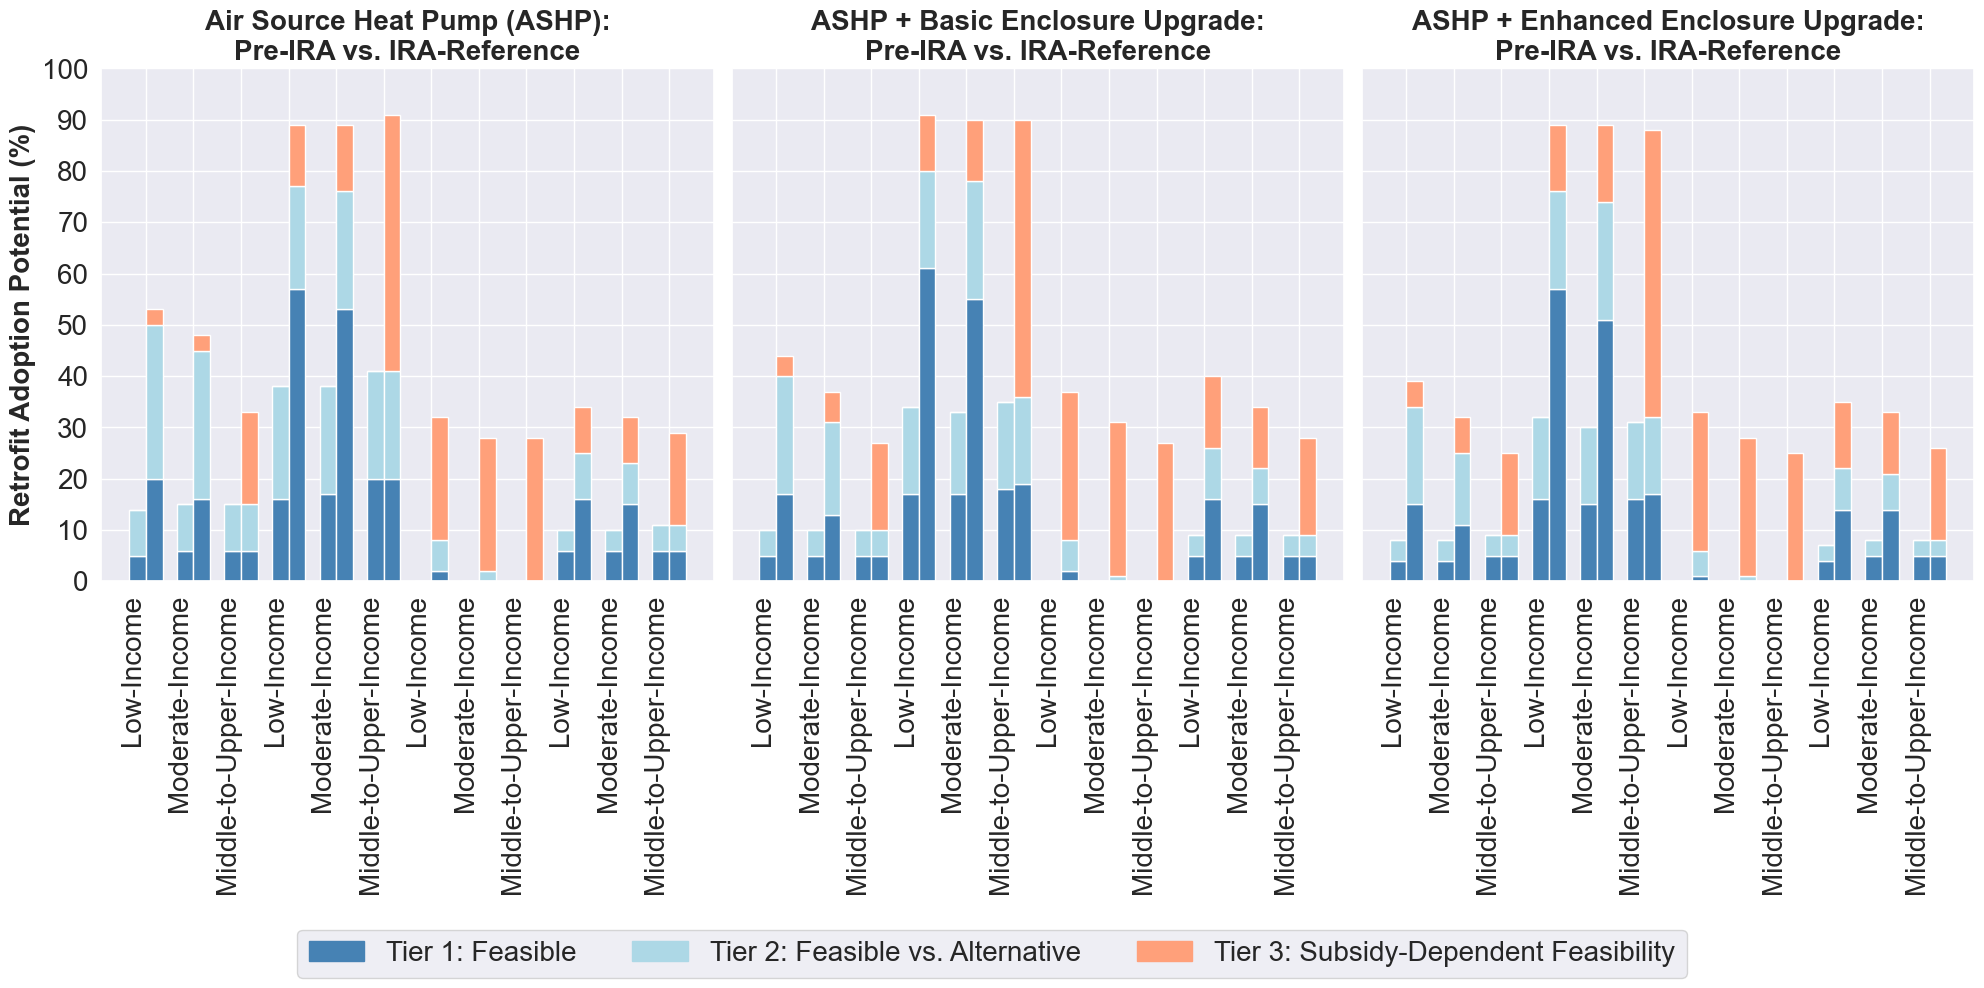

In [57]:
# LRMER
# SPACE HEATING - ALL 3 SCENARIOS
# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_heating_adoption_lrmer, 
                df_multiIndex_moderate_heating_adoption_lrmer, 
                df_multiIndex_advanced_heating_adoption_lrmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_heating_adoption_lrmer', 'iraRef_mp8_heating_adoption_lrmer'],
        ['preIRA_mp9_heating_adoption_lrmer', 'iraRef_mp9_heating_adoption_lrmer'],
        ['preIRA_mp10_heating_adoption_lrmer', 'iraRef_mp10_heating_adoption_lrmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    # x_labels=["", "",
    #           "", "",
    #           "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)",
    #          ],
    plot_titles=["Air Source Heat Pump (ASHP):\nPre-IRA vs. IRA-Reference", "ASHP + Basic Enclosure Upgrade:\nPre-IRA vs. IRA-Reference", "ASHP + Enhanced Enclosure Upgrade:\nPre-IRA vs. IRA-Reference"],
    y_labels=["Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=True,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

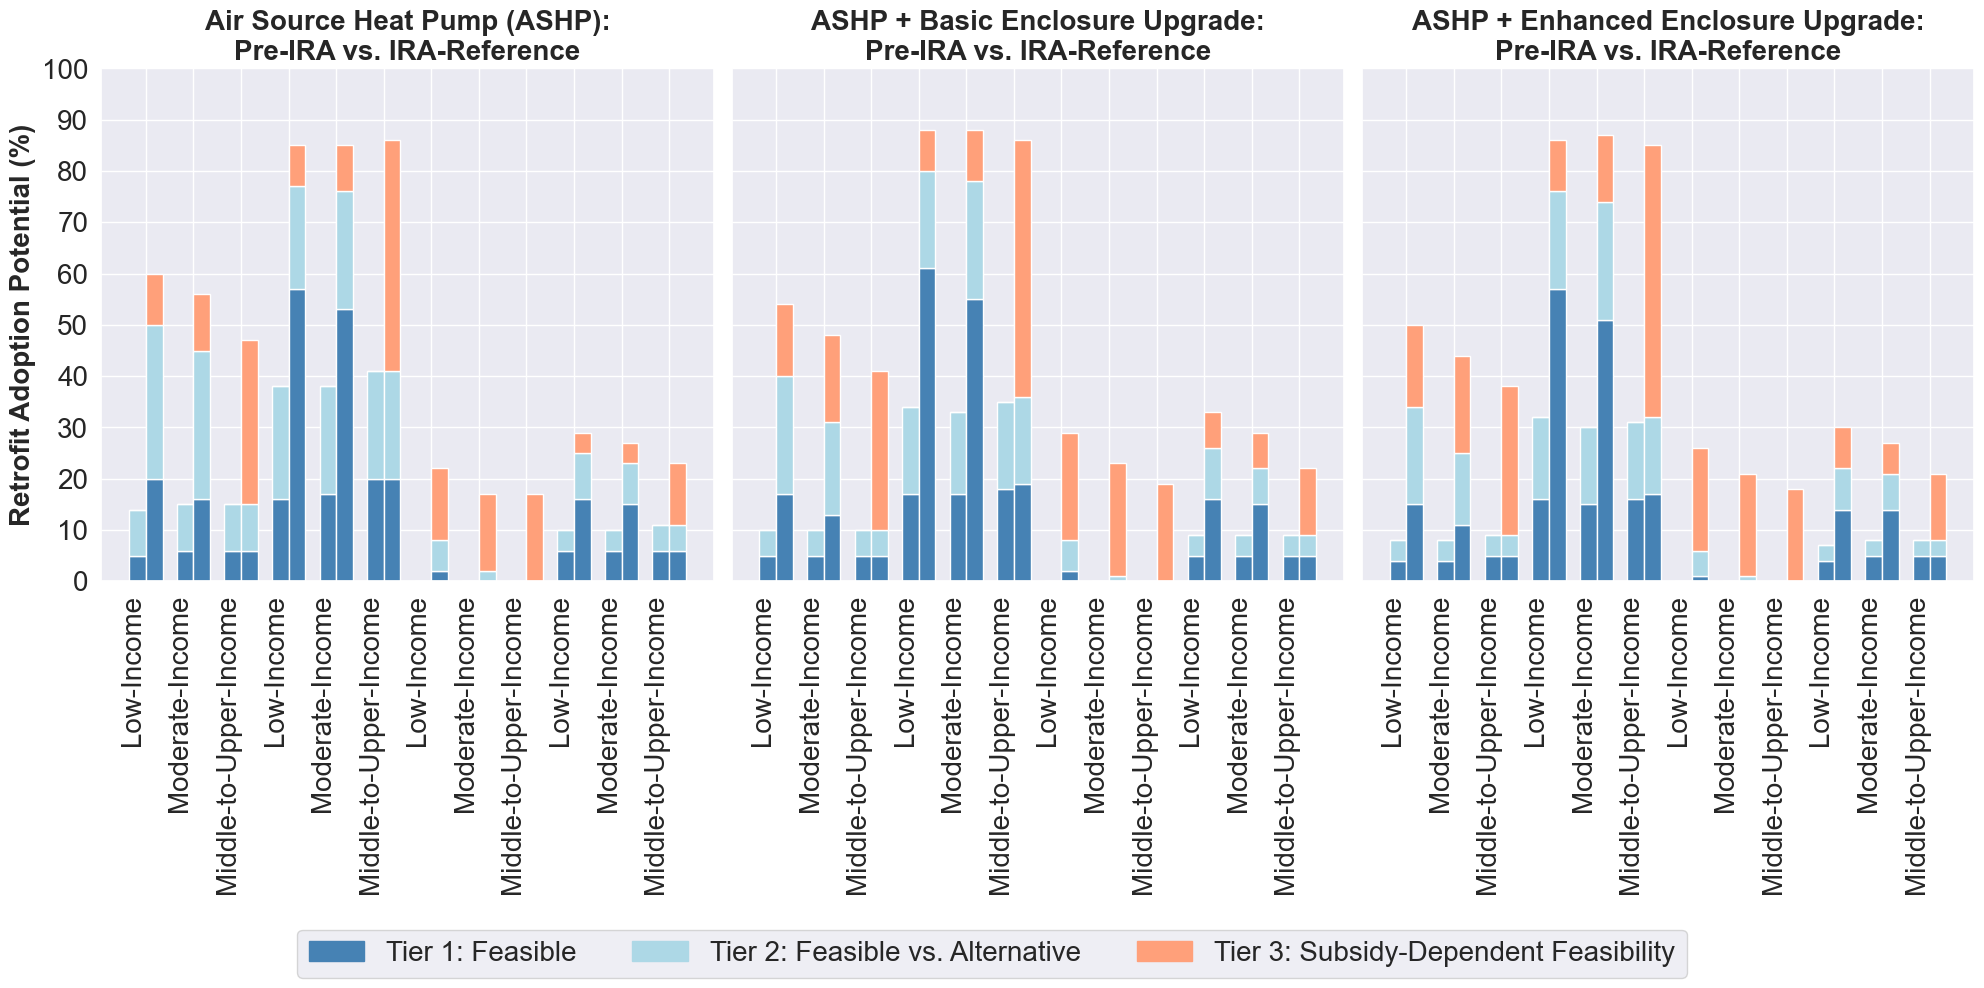

In [58]:
# SRMER
# SPACE HEATING - ALL 3 SCENARIOS
# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_heating_adoption_srmer, 
                df_multiIndex_moderate_heating_adoption_srmer, 
                df_multiIndex_advanced_heating_adoption_srmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_heating_adoption_srmer', 'iraRef_mp8_heating_adoption_srmer'],
        ['preIRA_mp9_heating_adoption_srmer', 'iraRef_mp9_heating_adoption_srmer'],
        ['preIRA_mp10_heating_adoption_srmer', 'iraRef_mp10_heating_adoption_srmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    # x_labels=["", "",
    #           "", "",
    #           "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)",
    #          ],
    plot_titles=["Air Source Heat Pump (ASHP):\nPre-IRA vs. IRA-Reference", "ASHP + Basic Enclosure Upgrade:\nPre-IRA vs. IRA-Reference", "ASHP + Enhanced Enclosure Upgrade:\nPre-IRA vs. IRA-Reference"],
    y_labels=["Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=True,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

In [59]:
df_multiIndex_basic_heating_adoption_lrmer

preIRA_mp8_heating_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   
Fuel Oil          Low-Income                                                 16.0   
                  Moderate-Income                                            17.0   
                  Middle-to-Upper-Income                                     20.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  6.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 9.0   
                  Moderate-Income                                            9.0   
                  Middle-to-Upper-Income                                     9.0   
Fuel Oil          Low-Income                                                22.0   
                  Moderate-Income                                           21.0   
                  Middle-to-Upper-Income                                    21.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     5.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [60]:
df_multiIndex_basic_heating_adoption_srmer

preIRA_mp8_heating_adoption_srmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   
Fuel Oil          Low-Income                                                 16.0   
                  Moderate-Income                                            17.0   
                  Middle-to-Upper-Income                                     20.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  6.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 9.0   
                  Moderate-Income                                            9.0   
                  Middle-to-Upper-Income                                     9.0   
Fuel Oil          Low-Income                                                22.0   
                  Moderate-Income                                           21.0   
                  Middle-to-Upper-Income                                    21.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     5.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [61]:
df_multiIndex_moderate_heating_adoption_lrmer

preIRA_mp9_heating_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             5.0   
                  Middle-to-Upper-Income                                      5.0   
Fuel Oil          Low-Income                                                 17.0   
                  Moderate-Income                                            17.0   
                  Middle-to-Upper-Income                                     18.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  5.0   
                  Moderate-Income                                             5.0   
                  Middle-to-Upper-Income                                      5.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 5.0   
                  Moderate-Income                                            5.0   
                  Middle-to-Upper-Income                                     5.0   
Fuel Oil          Low-Income                                                17.0   
                  Moderate-Income                                           16.0   
                  Middle-to-Upper-Income                                    17.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [62]:
df_multiIndex_moderate_heating_adoption_srmer

preIRA_mp9_heating_adoption_srmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             5.0   
                  Middle-to-Upper-Income                                      5.0   
Fuel Oil          Low-Income                                                 17.0   
                  Moderate-Income                                            17.0   
                  Middle-to-Upper-Income                                     18.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  5.0   
                  Moderate-Income                                             5.0   
                  Middle-to-Upper-Income                                      5.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 5.0   
                  Moderate-Income                                            5.0   
                  Middle-to-Upper-Income                                     5.0   
Fuel Oil          Low-Income                                                17.0   
                  Moderate-Income                                           16.0   
                  Middle-to-Upper-Income                                    17.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [63]:
df_multiIndex_advanced_heating_adoption_lrmer

preIRA_mp10_heating_adoption_lrmer  \
                                                                  Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                      
Electricity       Low-Income                                                   4.0   
                  Moderate-Income                                              4.0   
                  Middle-to-Upper-Income                                       5.0   
Fuel Oil          Low-Income                                                  16.0   
                  Moderate-Income                                             15.0   
                  Middle-to-Upper-Income                                      16.0   
Natural Gas       Low-Income                                                   0.0   
                  Moderate-Income                                              0.0   
                  Middle-to-Upper-Income                                       0.0   
Propane           Low-Income                                                   4.0   
                  Moderate-Income                                              5.0   
                  Middle-to-Upper-Income                                       5.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   
Fuel Oil          Low-Income                                                16.0   
                  Moderate-Income                                           15.0   
                  Middle-to-Upper-Income                                    15.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 3.0   
                  Moderate-Income                                            3.0   
                  Middle-to-Upper-Income                                     3.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_hea

In [64]:
df_multiIndex_advanced_heating_adoption_srmer

preIRA_mp10_heating_adoption_srmer  \
                                                                  Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                      
Electricity       Low-Income                                                   4.0   
                  Moderate-Income                                              4.0   
                  Middle-to-Upper-Income                                       5.0   
Fuel Oil          Low-Income                                                  16.0   
                  Moderate-Income                                             15.0   
                  Middle-to-Upper-Income                                      16.0   
Natural Gas       Low-Income                                                   0.0   
                  Moderate-Income                                              0.0   
                  Middle-to-Upper-Income                                       0.0   
Propane           Low-Income                                                   4.0   
                  Moderate-Income                                              5.0   
                  Middle-to-Upper-Income                                       5.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   
Fuel Oil          Low-Income                                                16.0   
                  Moderate-Income                                           15.0   
                  Middle-to-Upper-Income                                    15.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 3.0   
                  Moderate-Income                                            3.0   
                  Middle-to-Upper-Income                                     3.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_hea

# Water Heating, Clothes Drying, and Cooking

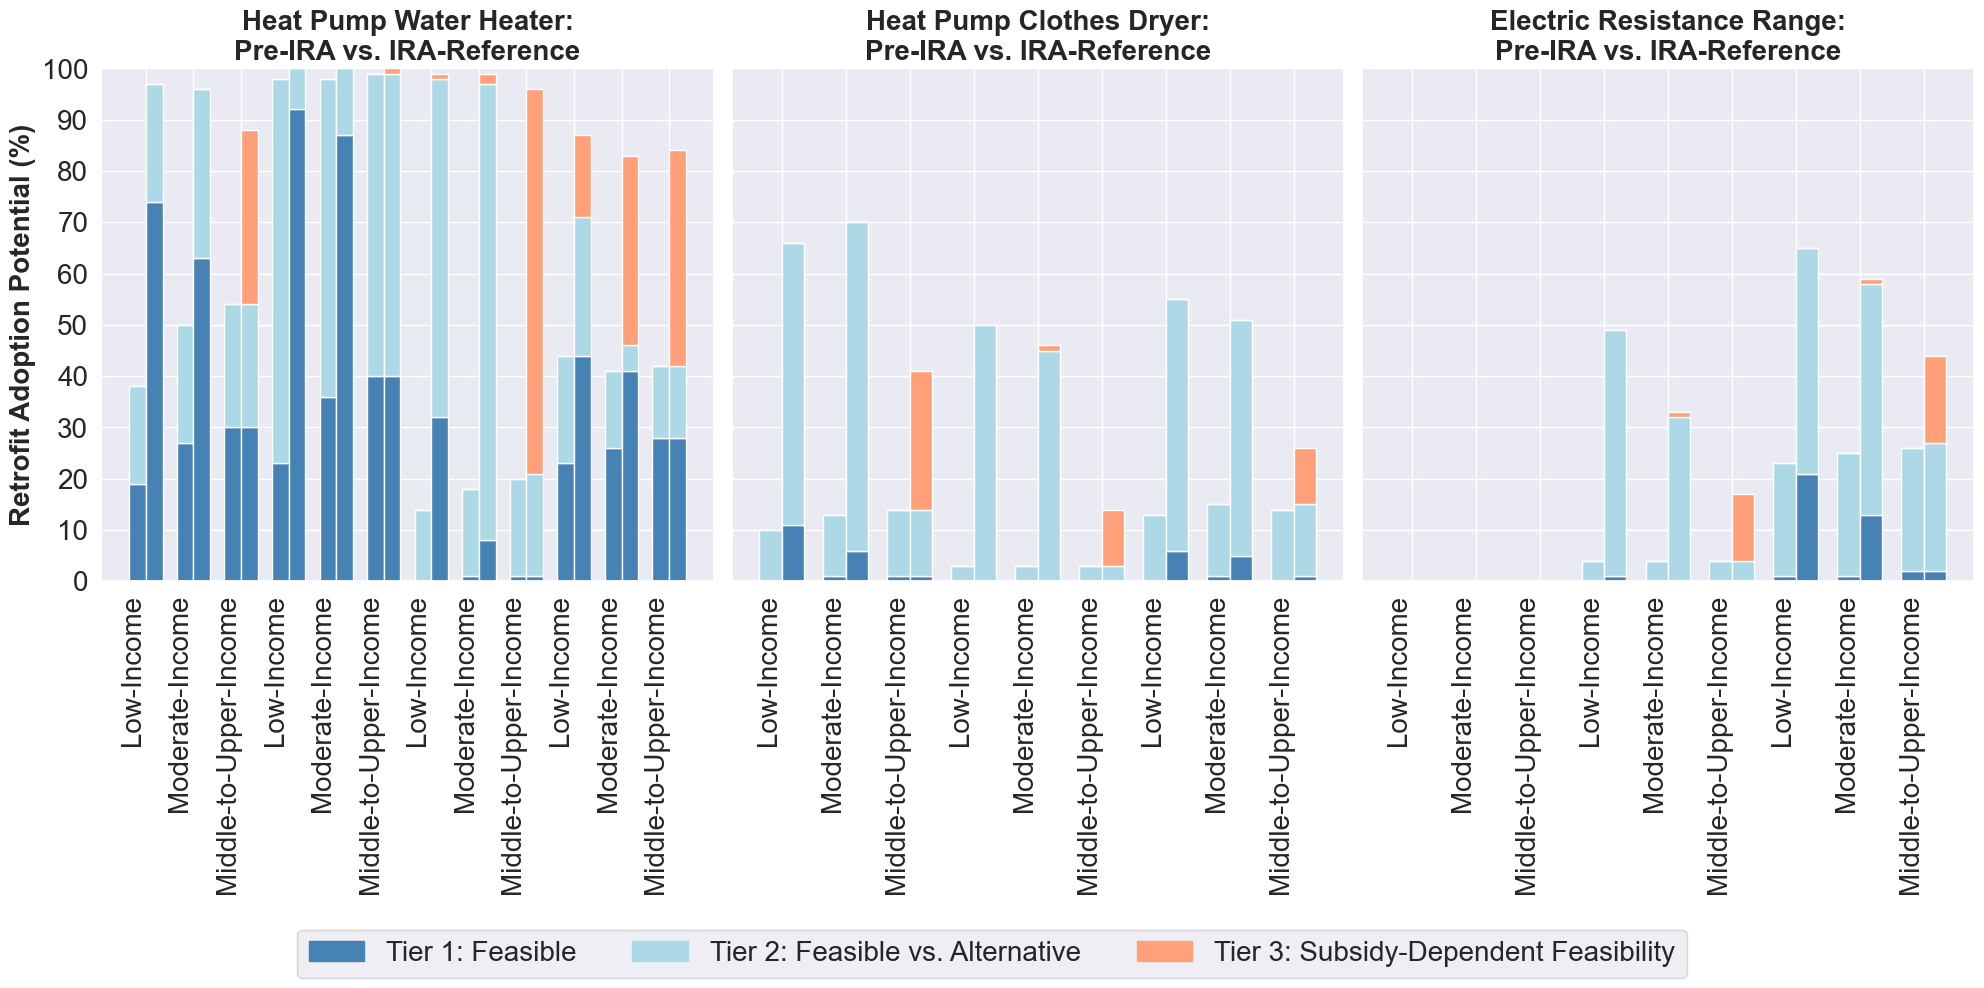

In [65]:
# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_waterHeating_adoption_lrmer, 
                df_multiIndex_basic_clothesDrying_adoption_lrmer, 
                df_multiIndex_basic_cooking_adoption_lrmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_waterHeating_adoption_lrmer', 'iraRef_mp8_waterHeating_adoption_lrmer'],
        ['preIRA_mp8_clothesDrying_adoption_lrmer', 'iraRef_mp8_clothesDrying_adoption_lrmer'],
        ['preIRA_mp8_cooking_adoption_lrmer', 'iraRef_mp8_cooking_adoption_lrmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2),
                    #    (1, 0), (1, 1), (1, 2),
                    #    (2, 0), (2, 1), (2, 2)
                       ],
    x_labels=["", "", "",
              "", "", "",
              "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)", ""
             ],
    plot_titles=["Heat Pump Water Heater:\nPre-IRA vs. IRA-Reference", "Heat Pump Clothes Dryer:\nPre-IRA vs. IRA-Reference", "Electric Resistance Range:\nPre-IRA vs. IRA-Reference"],
    y_labels=["Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=False,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

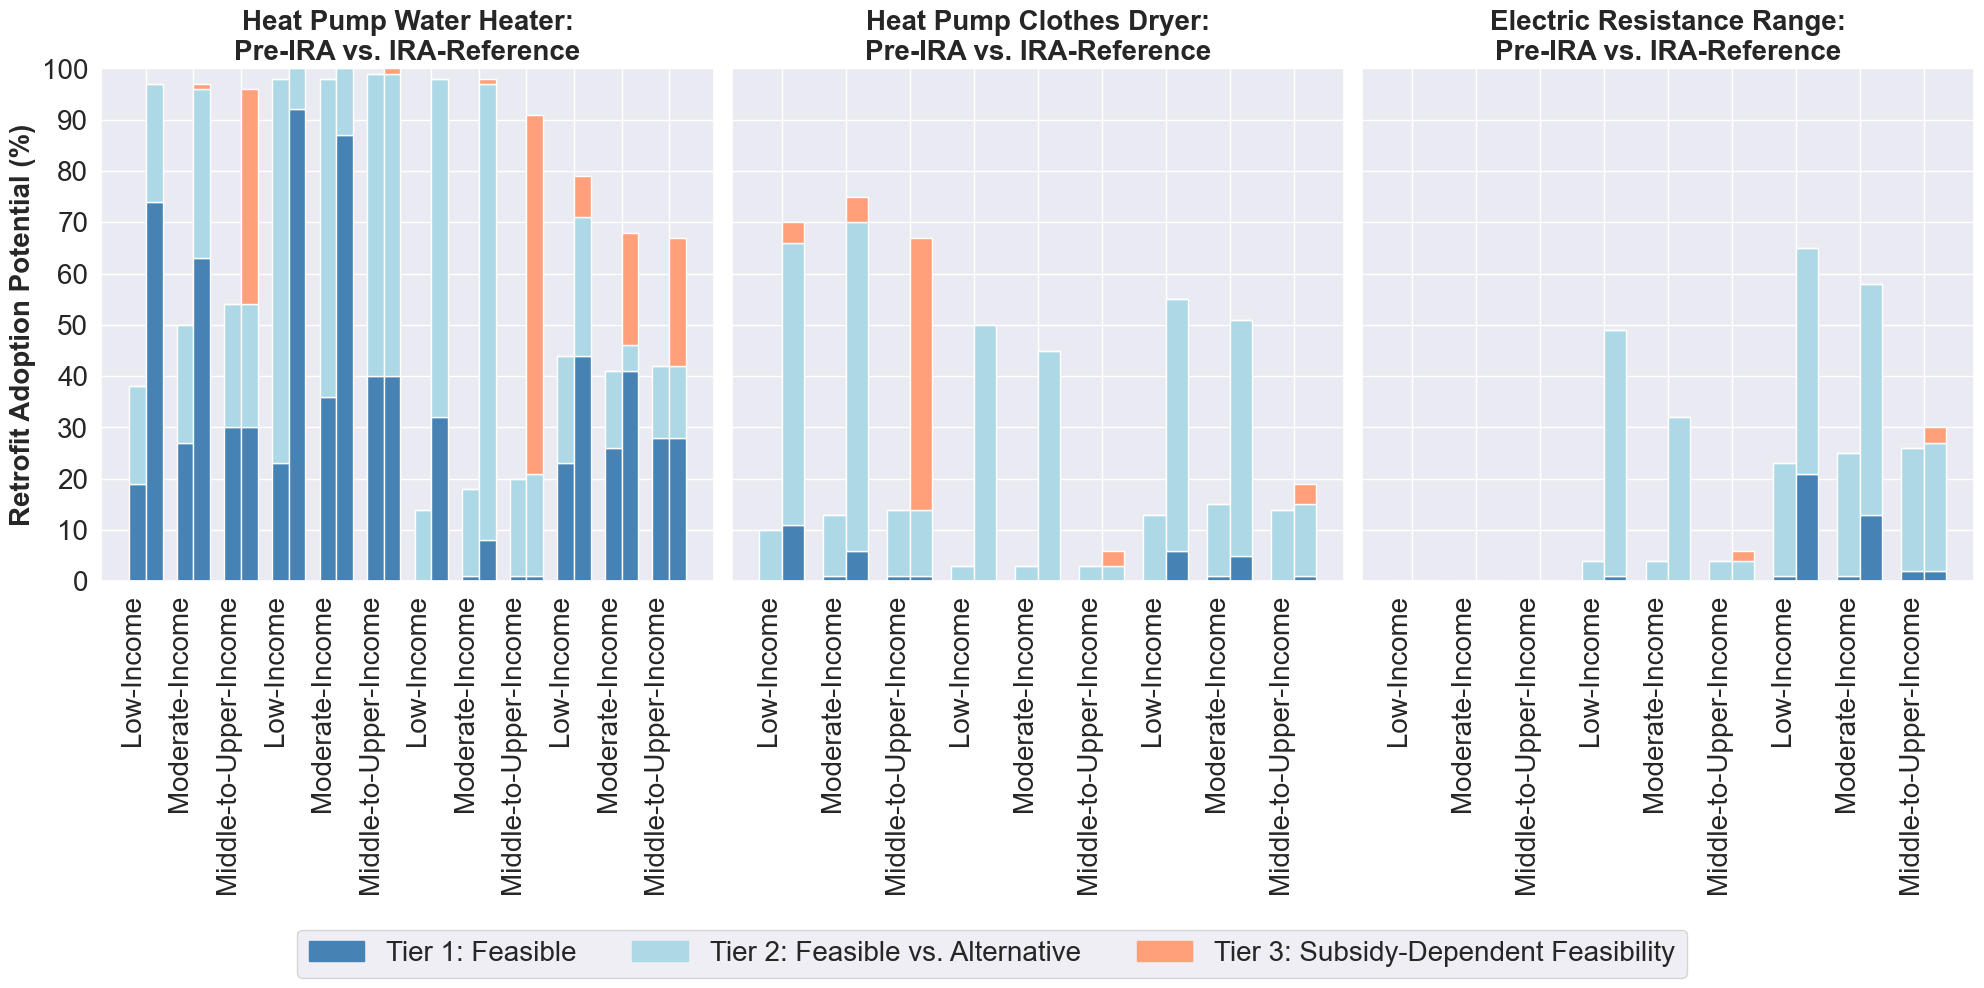

In [66]:
# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_waterHeating_adoption_srmer, 
                df_multiIndex_basic_clothesDrying_adoption_srmer, 
                df_multiIndex_basic_cooking_adoption_srmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_waterHeating_adoption_srmer', 'iraRef_mp8_waterHeating_adoption_srmer'],
        ['preIRA_mp8_clothesDrying_adoption_srmer', 'iraRef_mp8_clothesDrying_adoption_srmer'],
        ['preIRA_mp8_cooking_adoption_srmer', 'iraRef_mp8_cooking_adoption_srmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2),
                    #    (1, 0), (1, 1), (1, 2),
                    #    (2, 0), (2, 1), (2, 2)
                       ],
    x_labels=["", "", "",
              "", "", "",
              "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)", ""
             ],
    plot_titles=["Heat Pump Water Heater:\nPre-IRA vs. IRA-Reference", "Heat Pump Clothes Dryer:\nPre-IRA vs. IRA-Reference", "Electric Resistance Range:\nPre-IRA vs. IRA-Reference"],
    y_labels=["Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=False,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

In [67]:
df_multiIndex_basic_waterHeating_adoption_lrmer

preIRA_mp8_waterHeating_adoption_lrmer  \
                                                                           Tier 1: Feasible   
base_waterHeating_fuel lowModerateIncome_designation                                          
Electricity            Low-Income                                                      19.0   
                       Moderate-Income                                                 27.0   
                       Middle-to-Upper-Income                                          30.0   
Fuel Oil               Low-Income                                                      23.0   
                       Moderate-Income                                                 36.0   
                       Middle-to-Upper-Income                                          40.0   
Natural Gas            Low-Income                                                       0.0   
                       Moderate-Income                                                  1.0   
                       Middle-to-Upper-Income                                           1.0   
Propane                Low-Income                                                      23.0   
                       Moderate-Income                                                 26.0   
                       Middle-to-Upper-Income                                          28.0   

                                                                                       \
                                                     Tier 2: Feasible vs. Alternative   
base_waterHeating_fuel lowModerateIncome_designation                                    
Electricity            Low-Income                                                19.0   
                       Moderate-Income                                           23.0   
                       Middle-to-Upper-Income                                    24.0   
Fuel Oil               Low-Income                                                75.0   
                       Moderate-Income                                           62.0   
                       Middle-to-Upper-Income                                    59.0   
Natural Gas            Low-Income                                                14.0   
                       Moderate-Income                                           17.0   
                       Middle-to-Upper-Income                                    19.0   
Propane                Low-Income                                                21.0   
                       Moderate-Income                                           15.0   
                       Middle-to-Upper-Income                                    14.0   

                                                                                            \
                                                     Tier 3: Subsidy-Dependent Feasibility   
base_waterHeating_fuel lowModerateIncome_designation                                         
Electricity            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Fuel Oil               Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Natural Gas            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Propane                Low-Income                                                      0.0   
                       Moderate-Income                               

In [68]:
df_multiIndex_basic_waterHeating_adoption_srmer

preIRA_mp8_waterHeating_adoption_srmer  \
                                                                           Tier 1: Feasible   
base_waterHeating_fuel lowModerateIncome_designation                                          
Electricity            Low-Income                                                      19.0   
                       Moderate-Income                                                 27.0   
                       Middle-to-Upper-Income                                          30.0   
Fuel Oil               Low-Income                                                      23.0   
                       Moderate-Income                                                 36.0   
                       Middle-to-Upper-Income                                          40.0   
Natural Gas            Low-Income                                                       0.0   
                       Moderate-Income                                                  1.0   
                       Middle-to-Upper-Income                                           1.0   
Propane                Low-Income                                                      23.0   
                       Moderate-Income                                                 26.0   
                       Middle-to-Upper-Income                                          28.0   

                                                                                       \
                                                     Tier 2: Feasible vs. Alternative   
base_waterHeating_fuel lowModerateIncome_designation                                    
Electricity            Low-Income                                                19.0   
                       Moderate-Income                                           23.0   
                       Middle-to-Upper-Income                                    24.0   
Fuel Oil               Low-Income                                                75.0   
                       Moderate-Income                                           62.0   
                       Middle-to-Upper-Income                                    59.0   
Natural Gas            Low-Income                                                14.0   
                       Moderate-Income                                           17.0   
                       Middle-to-Upper-Income                                    19.0   
Propane                Low-Income                                                21.0   
                       Moderate-Income                                           15.0   
                       Middle-to-Upper-Income                                    14.0   

                                                                                            \
                                                     Tier 3: Subsidy-Dependent Feasibility   
base_waterHeating_fuel lowModerateIncome_designation                                         
Electricity            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Fuel Oil               Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Natural Gas            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Propane                Low-Income                                                      0.0   
                       Moderate-Income                               

In [69]:
df_multiIndex_basic_clothesDrying_adoption_lrmer

preIRA_mp8_clothesDrying_adoption_lrmer  \
                                                                             Tier 1: Feasible   
base_clothesDrying_fuel lowModerateIncome_designation                                           
Electricity             Low-Income                                                        0.0   
                        Moderate-Income                                                   1.0   
                        Middle-to-Upper-Income                                            1.0   
Natural Gas             Low-Income                                                        0.0   
                        Moderate-Income                                                   0.0   
                        Middle-to-Upper-Income                                            0.0   
Propane                 Low-Income                                                        0.0   
                        Moderate-Income                                                   1.0   
                        Middle-to-Upper-Income                                            0.0   

                                                                                        \
                                                      Tier 2: Feasible vs. Alternative   
base_clothesDrying_fuel lowModerateIncome_designation                                    
Electricity             Low-Income                                                10.0   
                        Moderate-Income                                           12.0   
                        Middle-to-Upper-Income                                    13.0   
Natural Gas             Low-Income                                                 3.0   
                        Moderate-Income                                            3.0   
                        Middle-to-Upper-Income                                     3.0   
Propane                 Low-Income                                                13.0   
                        Moderate-Income                                           14.0   
                        Middle-to-Upper-Income                                    14.0   

                                                                                             \
                                                      Tier 3: Subsidy-Dependent Feasibility   
base_clothesDrying_fuel lowModerateIncome_designation                                         
Electricity             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Natural Gas             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Propane                 Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   

                                                                                \
                                                      Total Adoption Potential   
base_clothesDrying_fuel lowModerateIncome_designation                            
Electricity             Low-Income                                        10.0   
                        Moderate-Income                                   13.0   
                        Middle-to-Upper-Income                            14.0   
Natural Gas             Low-Income                                         3.0   
                        Moderate-Income                                    3.0   
           

In [70]:
df_multiIndex_basic_clothesDrying_adoption_srmer

preIRA_mp8_clothesDrying_adoption_srmer  \
                                                                             Tier 1: Feasible   
base_clothesDrying_fuel lowModerateIncome_designation                                           
Electricity             Low-Income                                                        0.0   
                        Moderate-Income                                                   1.0   
                        Middle-to-Upper-Income                                            1.0   
Natural Gas             Low-Income                                                        0.0   
                        Moderate-Income                                                   0.0   
                        Middle-to-Upper-Income                                            0.0   
Propane                 Low-Income                                                        0.0   
                        Moderate-Income                                                   1.0   
                        Middle-to-Upper-Income                                            0.0   

                                                                                        \
                                                      Tier 2: Feasible vs. Alternative   
base_clothesDrying_fuel lowModerateIncome_designation                                    
Electricity             Low-Income                                                10.0   
                        Moderate-Income                                           12.0   
                        Middle-to-Upper-Income                                    13.0   
Natural Gas             Low-Income                                                 3.0   
                        Moderate-Income                                            3.0   
                        Middle-to-Upper-Income                                     3.0   
Propane                 Low-Income                                                13.0   
                        Moderate-Income                                           14.0   
                        Middle-to-Upper-Income                                    14.0   

                                                                                             \
                                                      Tier 3: Subsidy-Dependent Feasibility   
base_clothesDrying_fuel lowModerateIncome_designation                                         
Electricity             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Natural Gas             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Propane                 Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   

                                                                                \
                                                      Total Adoption Potential   
base_clothesDrying_fuel lowModerateIncome_designation                            
Electricity             Low-Income                                        10.0   
                        Moderate-Income                                   13.0   
                        Middle-to-Upper-Income                            14.0   
Natural Gas             Low-Income                                         3.0   
                        Moderate-Income                                    3.0   
           

In [71]:
df_multiIndex_basic_cooking_adoption_lrmer

preIRA_mp8_cooking_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_cooking_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  1.0   
                  Moderate-Income                                             1.0   
                  Middle-to-Upper-Income                                      2.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_cooking_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Natural Gas       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   
Propane           Low-Income                                                22.0   
                  Moderate-Income                                           24.0   
                  Middle-to-Upper-Income                                    24.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_cooking_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_cooking_fuel lowModerateIncome_designation                            
Electricity       Low-Income                                         0.0   
                  Moderate-Income                                    0.0   
                  Middle-to-Upper-Income                             0.0   
Natural Gas       Low-Income                                         4.0   
                  Moderate-Income                                    4.0   
                  Middle-to-Upper-Income                             4.0   
Propane           Low-Income                                        23.0   
                  Moderate-Income                                   25.0   
                  Middle-to-Upper-Income                            26.0   

                                    

In [72]:
df_multiIndex_basic_cooking_adoption_srmer

preIRA_mp8_cooking_adoption_srmer  \
                                                                 Tier 1: Feasible   
base_cooking_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  1.0   
                  Moderate-Income                                             1.0   
                  Middle-to-Upper-Income                                      2.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_cooking_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Natural Gas       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   
Propane           Low-Income                                                22.0   
                  Moderate-Income                                           24.0   
                  Middle-to-Upper-Income                                    24.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_cooking_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_cooking_fuel lowModerateIncome_designation                            
Electricity       Low-Income                                         0.0   
                  Moderate-Income                                    0.0   
                  Middle-to-Upper-Income                             0.0   
Natural Gas       Low-Income                                         4.0   
                  Moderate-Income                                    4.0   
                  Middle-to-Upper-Income                             4.0   
Propane           Low-Income                                        23.0   
                  Moderate-Income                                   25.0   
                  Middle-to-Upper-Income                            26.0   

                                    

# Cost-Effectiveness and Retrofit Priorities
## Dollars of IRA Rebate Invested per mtCO2e Avoided

In [73]:
# LAST UPDATED SEPTEMBER 19, 2024
def subplot_grid_co2_abatement(dataframes, subplot_positions, epa_scc_values, x_cols, y_cols, hues, plot_titles=None, x_labels=None, y_labels=None, suptitle=None, figure_size=(12, 10), sharex=False, sharey=False):
    """
    Creates a grid of subplots to visualize CO2 abatement cost effectiveness across different datasets and scenarios.
    """
    num_cols = max(pos[1] for pos in subplot_positions) + 1
    num_rows = max(pos[0] for pos in subplot_positions) + 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)
    axes = np.array(axes).reshape(num_rows, num_cols)  # Ensure axes is always 2D

    for idx, (df, epa_scc, x_col, y_col, hue) in enumerate(zip(dataframes, epa_scc_values, x_cols, y_cols, hues)):
        pos = subplot_positions[idx]
        ax = axes[pos[0], pos[1]]
        title = plot_titles[idx] if plot_titles else ""
        x_label = x_labels[idx] if x_labels else ""
        y_label = y_labels[idx] if y_labels else ""

        # Plot using the plot_co2_abatement function, passing the current axis to it
        plot_co2_abatement(df, x_col, y_col, hue, epa_scc, ax=ax)

        # Set custom labels and title if provided
        ax.set_xlabel(x_label, fontweight='bold', fontsize=18)
        ax.set_ylabel(y_label, fontweight='bold', fontsize=18)
        ax.set_title(title, fontweight='bold', fontsize=18)

        # Set font size for tick labels on the x-axis
        ax.tick_params(axis='x', labelsize=18)

        # Set font size for tick labels on the y-axis
        ax.tick_params(axis='y', labelsize=18)

    if suptitle:
        plt.suptitle(suptitle, fontweight='bold')

    # Create a consolidated legend by grabbing handles and labels from all subplots
    handles, labels = [], []
    for ax in axes.flatten():
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:  # Avoid duplicates
                handles.append(handle)
                labels.append(label)

    # # Add the consolidated legend outside the plots
    # fig.legend(handles, labels, loc='lower center', ncol=5, prop={'size': 18}, labelspacing=0.25, bbox_to_anchor=(0.5, -0.01))

    # # Adjust the layout
    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to leave space for the suptitle

    # Add the consolidated legend outside the plots
    fig.legend(handles, labels, loc='lower center', ncol=5, prop={'size': 16}, labelspacing=0.25, handletextpad=1, columnspacing=1, bbox_to_anchor=(0.5, -0.05), bbox_transform=fig.transFigure)

    # Fine-tune the layout adjustment if needed
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted the rect to leave space for the suptitle and legend

    plt.show()

def plot_co2_abatement(df, x_col, y_col, hue, epa_scc_usd2023_per_ton, ax=None):
    """
    Plots a boxplot of CO2 abatement cost effectiveness.

    Parameters:
    - df: DataFrame containing the data.
    - x_col: Column name for the x-axis.
    - y_col: Column name for the y-axis.
    - hue: Column name for the hue (categorical variable for color).
    - epa_scc_usd2023_per_ton: Value for the red dashed line indicating SCC.
    - ax: Axis object to plot on. If None, creates a new plot.
    
    Returns:
    - None: Displays the plot.
    """
    # Filter out the 'Middle-to-Upper-Income' rows and create a copy to avoid SettingWithCopyWarning
    df_copy = df.copy()
    df_filtered = df_copy[df_copy[x_col] != 'Middle-to-Upper-Income']

    # If x_col is categorical, remove unused categories
    if df_filtered[x_col].dtype.name == 'category':
        df_filtered.loc[:, x_col] = df_filtered[x_col].cat.remove_unused_categories()

    # Color map for fuel types
    color_map_fuel = {
        'Electricity': 'seagreen',
        'Natural Gas': 'steelblue',
        'Propane': 'orange',
        'Fuel Oil': 'firebrick',
    }

    if ax is None:
        ax = plt.gca()

    # Create the boxplot
    sns.boxplot(
        data=df_filtered,
        x=x_col, 
        y=y_col, 
        hue=hue, 
        palette=color_map_fuel, 
        showfliers=False,
        width=0.8,
        ax=ax
    )

    # Add a red dashed line at the value of epa_scc_usd2023_per_ton
    ax.axhline(y=epa_scc_usd2023_per_ton, color='red', linestyle='--', linewidth=2, label=f'SCC (USD2023): ${int(round((epa_scc_usd2023_per_ton), 0))}/mtCO2e')

    # Remove the individual legend for each subplot
    ax.legend_.remove()

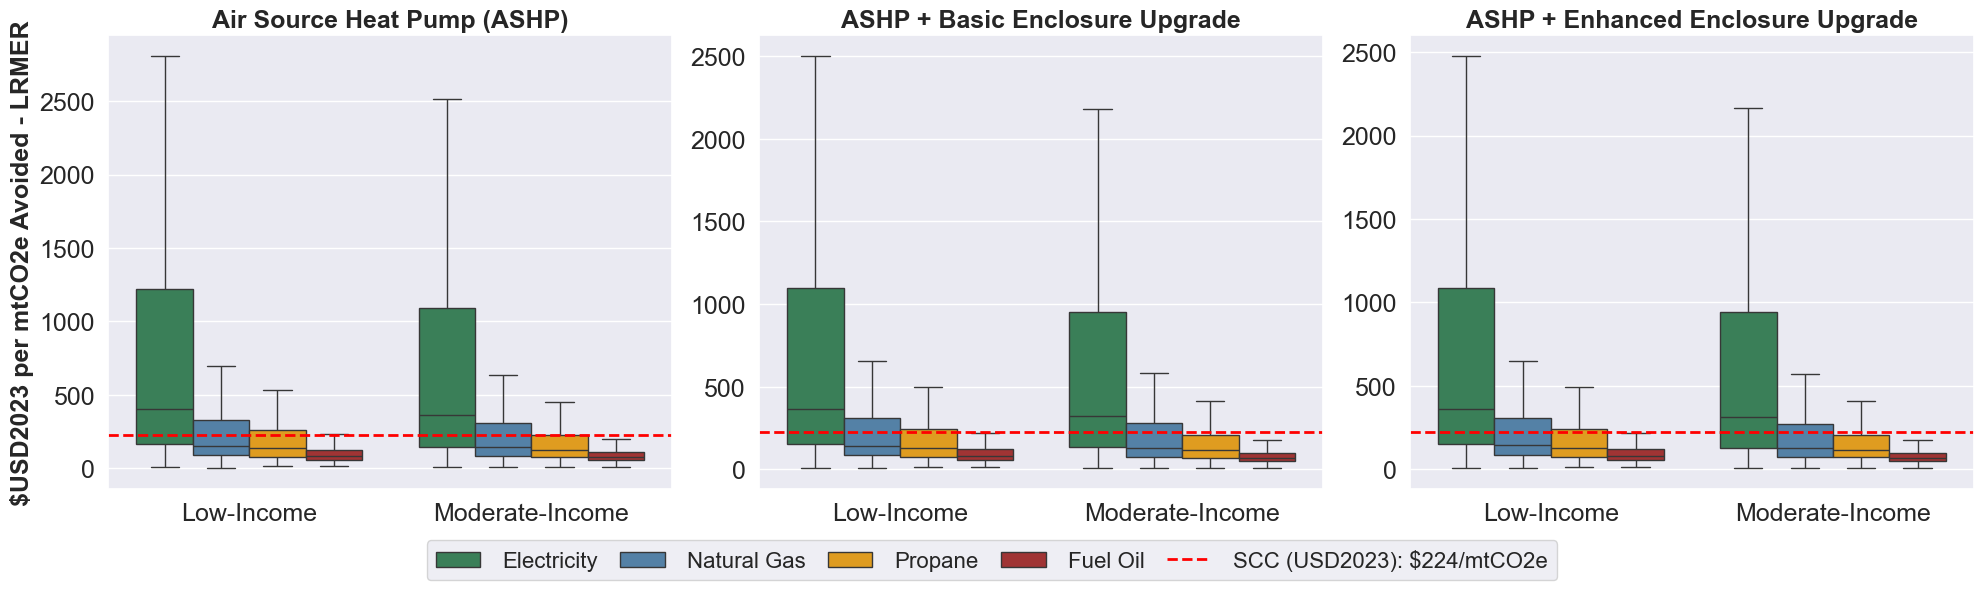

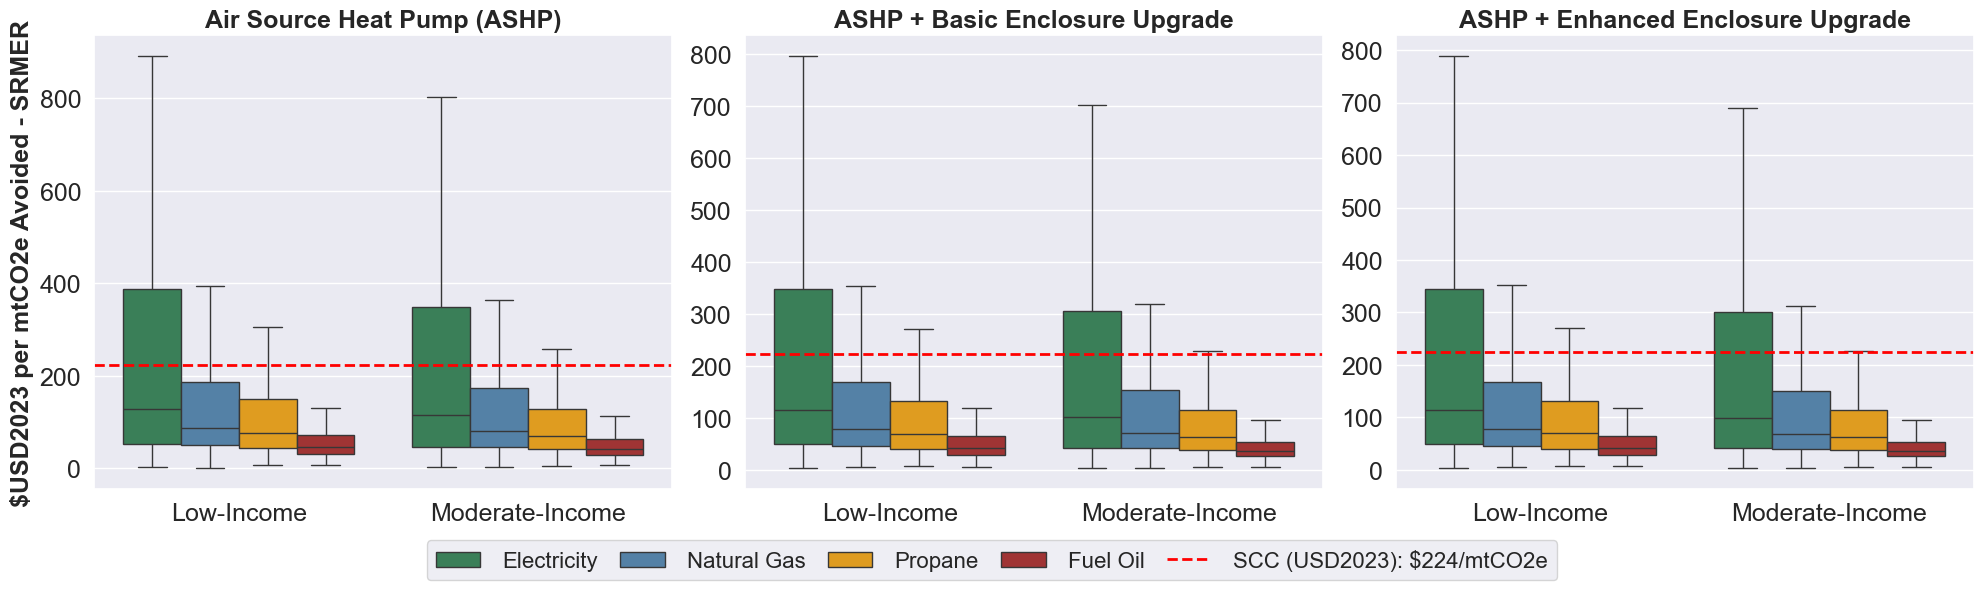

In [74]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_lrmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_srmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

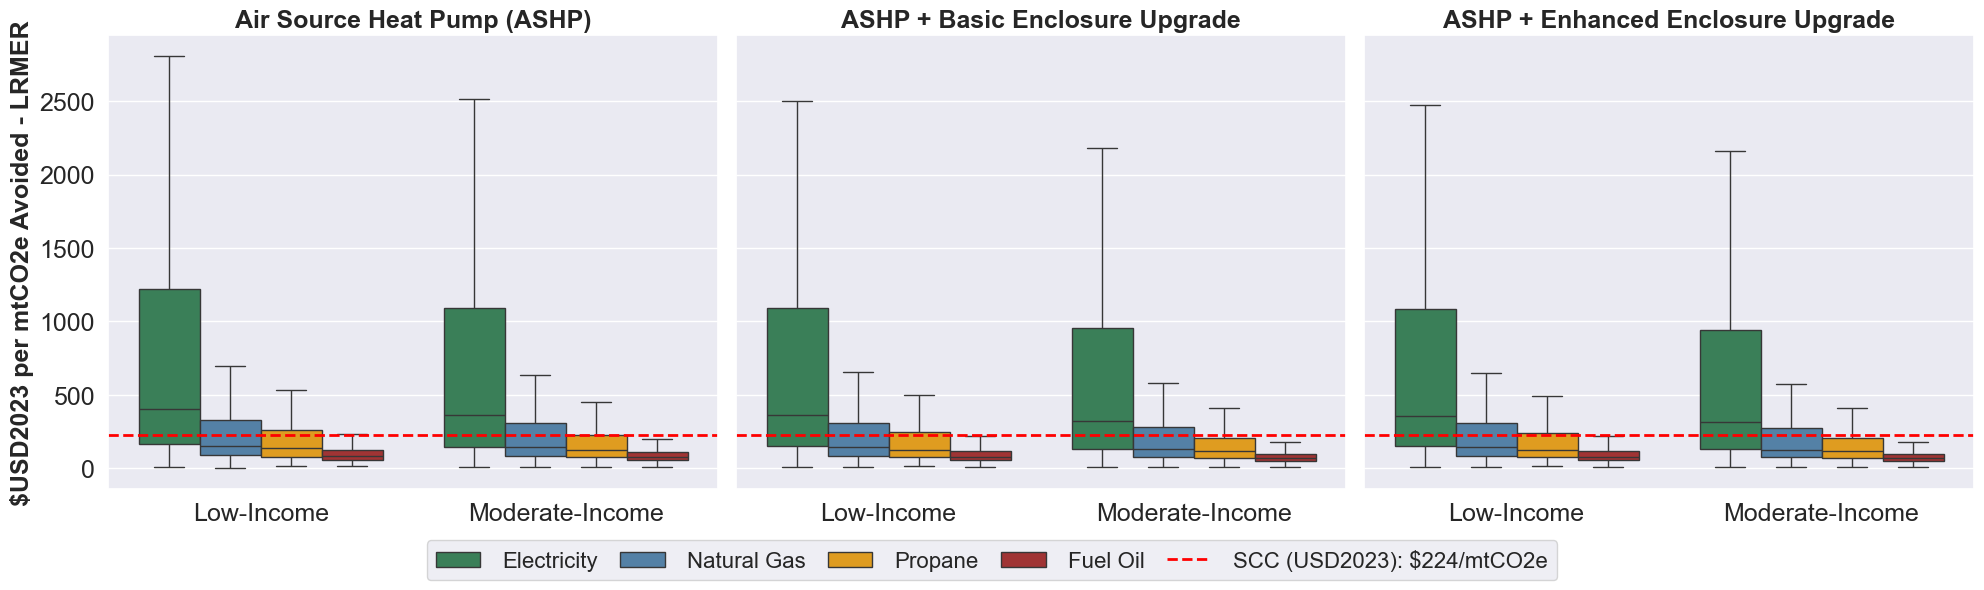

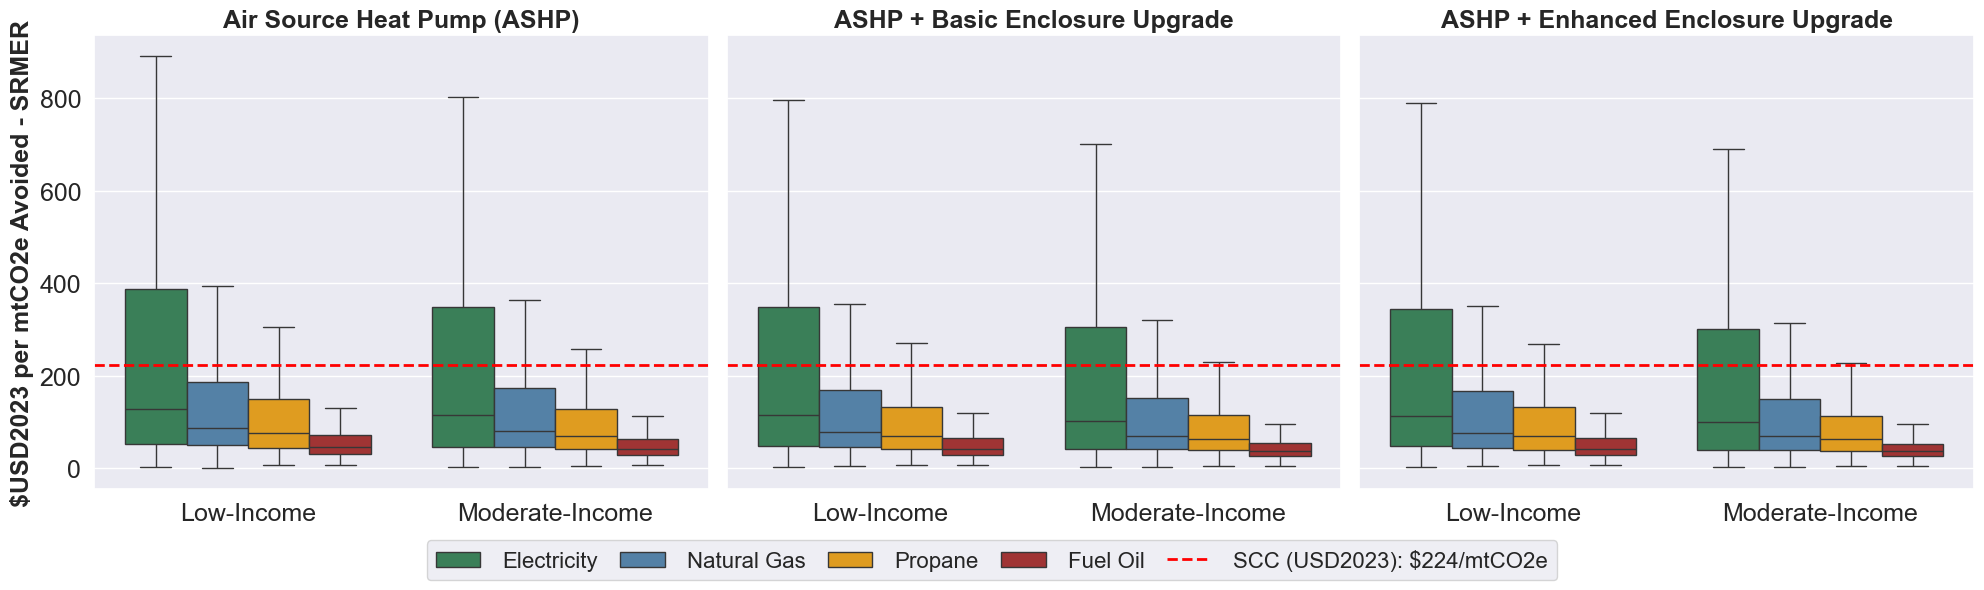

In [75]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_lrmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_srmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

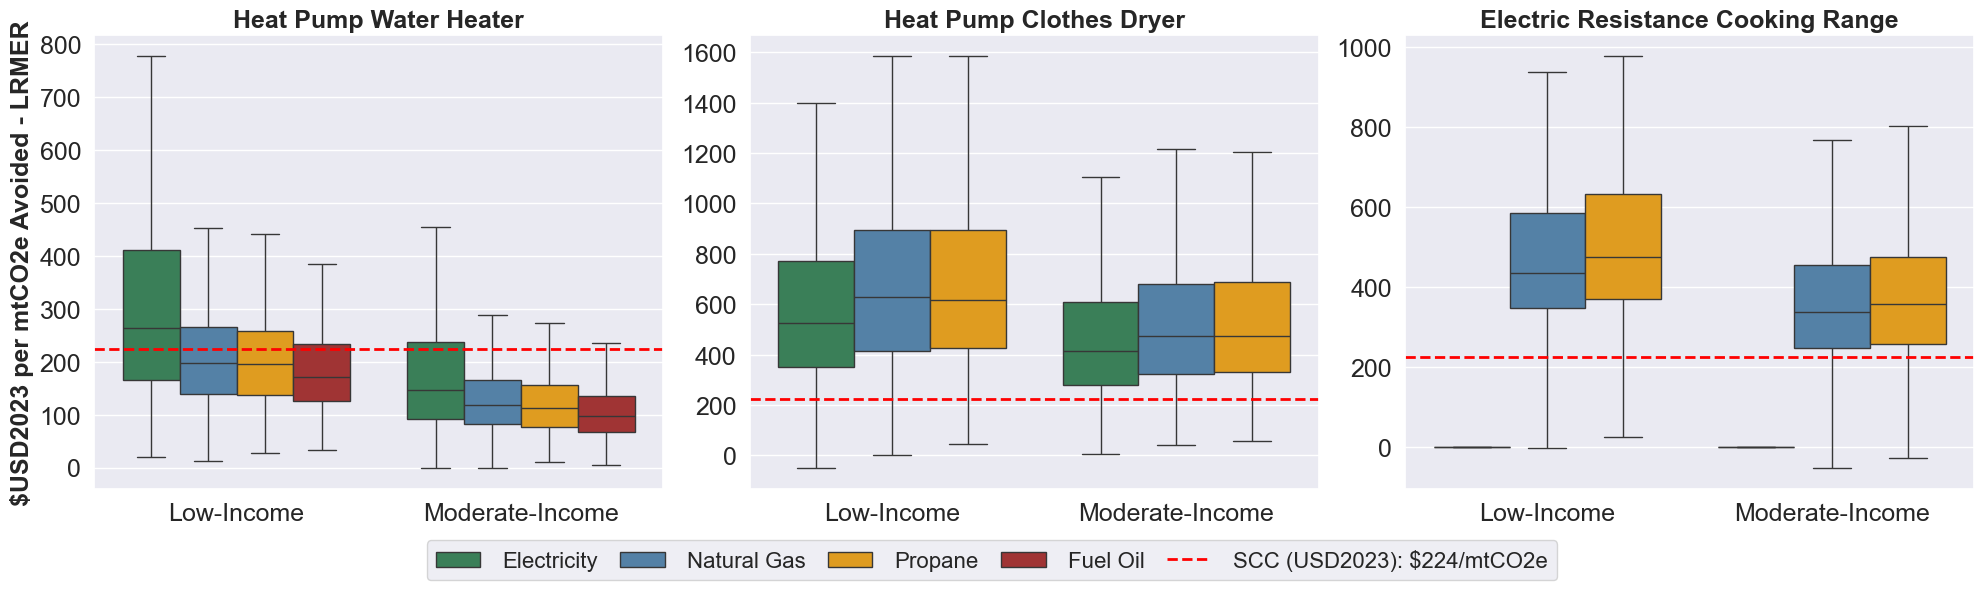

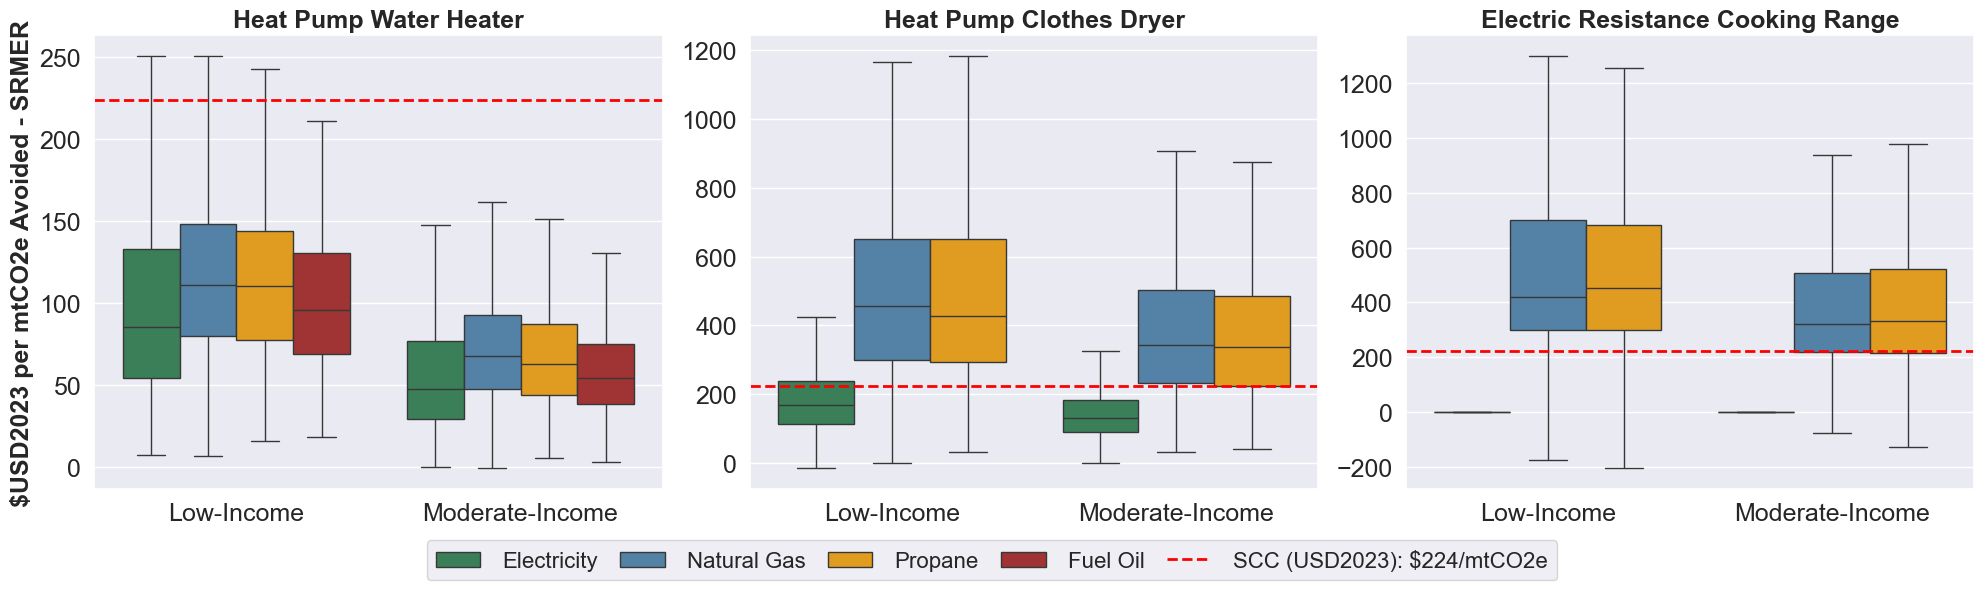

In [76]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_lrmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_srmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

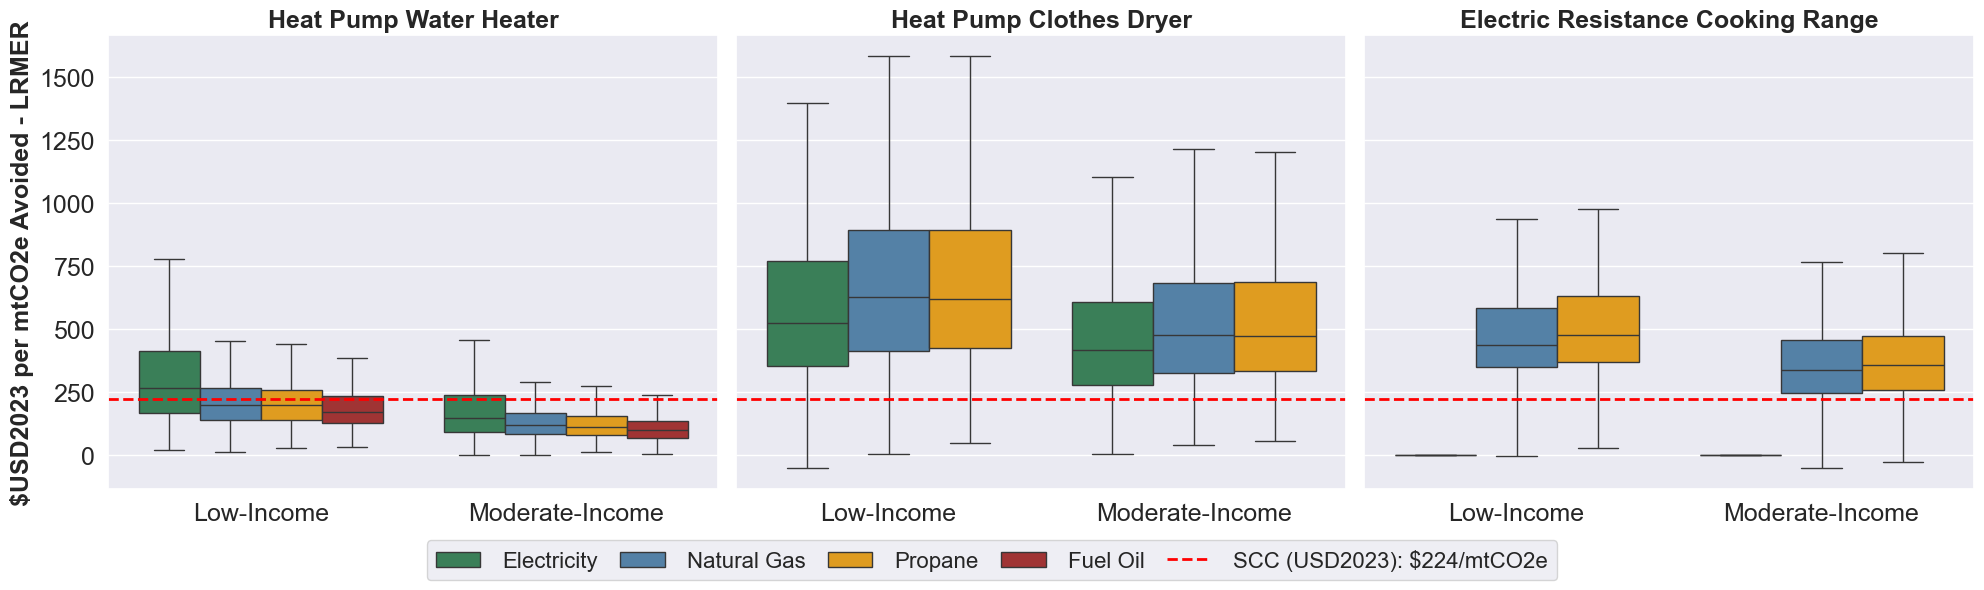

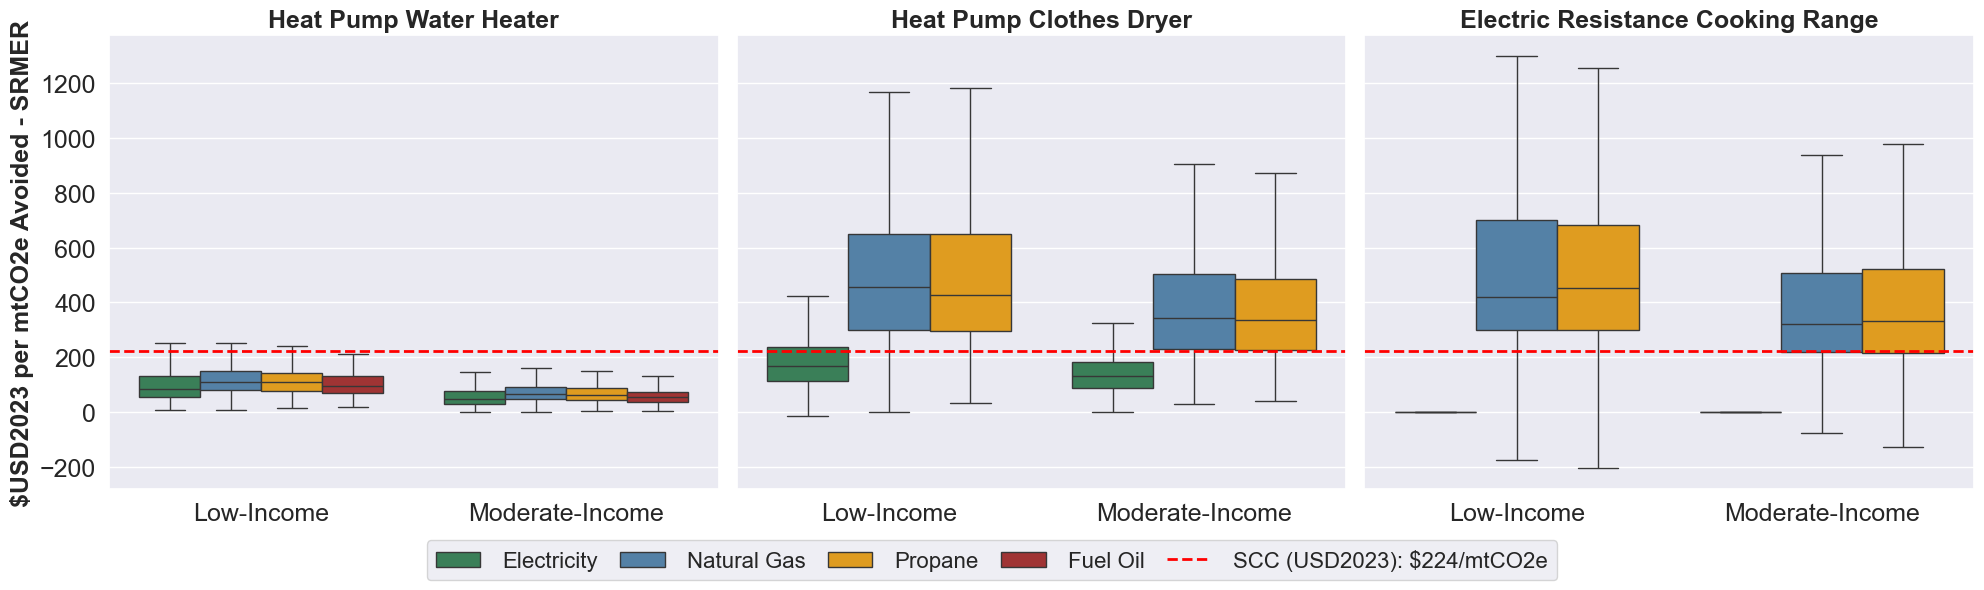

In [77]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_lrmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton, epa_scc_usd2023_per_ton],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_srmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

## Private NPV and Percent AMI: Before and After IRA
- Pre IRA and IRA Ref Scatter Plot